In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %inline matplotlib
os.chdir(r"C:\Users\MANDY\Desktop\dataset")
data = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])
data.drop('id', axis = 1, inplace= True)
#data.index = pd.to_datetime(data.index)

In [92]:
new_data = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])
new_data

,id,feature
time,,
2019-03-19 00:00:00,0,237.97
2019-03-19 00:00:10,1,57.93
2019-03-19 00:00:20,2,90.53
2019-03-19 00:00:30,3,260.75
2019-03-19 00:00:40,4,49.70
...,...,...
2019-03-19 00:12:30,75,469.72
2019-03-19 00:12:40,76,406.79
2019-03-19 00:12:50,77,128.91


In [44]:
print(data.mean(),data.var(),data.std())

feature    147.496375
dtype: float64 feature    9379.198016
dtype: float64 feature    96.84626
dtype: float64


In [45]:
df1 = pd.read_csv("test_csv (1).csv",index_col=['time'], parse_dates=['time'])
df1.index = pd.to_datetime(df1.index)

In [47]:
rollmean = data.rolling(window =2).mean()
rollstd = data.rolling(window =2).std()
print(rollmean,rollstd)

                     feature
time                        
2019-03-19 00:00:00      NaN
2019-03-19 00:00:10  147.950
2019-03-19 00:00:20   74.230
2019-03-19 00:00:30  175.640
2019-03-19 00:00:40  155.225
...                      ...
2019-03-19 00:12:30  435.575
2019-03-19 00:12:40  438.255
2019-03-19 00:12:50  267.850
2019-03-19 00:13:00  107.095
2019-03-19 00:13:10  103.200

[80 rows x 1 columns]                         feature
time                           
2019-03-19 00:00:00         NaN
2019-03-19 00:00:10  127.307505
2019-03-19 00:00:20   23.051681
2019-03-19 00:00:30  120.363716
2019-03-19 00:00:40  149.234886
...                         ...
2019-03-19 00:12:30   48.288322
2019-03-19 00:12:40   44.498230
2019-03-19 00:12:50  196.490832
2019-03-19 00:13:00   30.851069
2019-03-19 00:13:10   25.342707

[80 rows x 1 columns]


C:\Users\MANDY\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


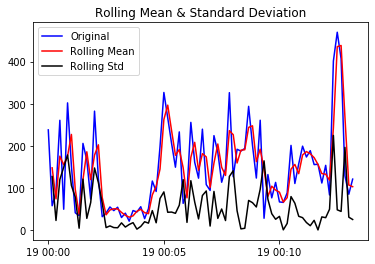

In [3]:
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

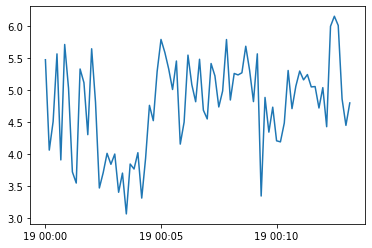

In [48]:
import numpy as np
import numpy as np
data_log = np.log(data)
plt.plot(data_log)

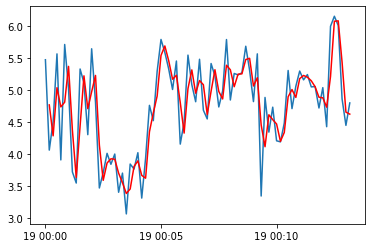

In [5]:
movingaverage = data_log.rolling(window = 2).mean()
movingstd = data_log.rolling(window = 2).std()
plt.plot(data_log)
plt.plot(movingaverage , color = 'red')

In [9]:
datascale = data_log - movingaverage
datascale.dropna(inplace = True)
datascale.head()


,feature
time,
2019-03-19 00:00:10,-0.706455
2019-03-19 00:00:20,0.223223
2019-03-19 00:00:30,0.528940
2019-03-19 00:00:40,-0.828779
2019-03-19 00:00:50,0.902343


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rollmean = data.rolling(window =2).mean()
    rollstd = data.rolling(window =2).std()
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rollmean, color='red', label='Rolling Mean')
    std = plt.plot(rollstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAEICAYAAACktLTqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9d3wc1bn//z676l2yZVvFtmTJvcm4QWwI2JheTWgJYBIuoYQACeHe9HATSEK+/AJJIAUClxAcOoSSQsDYgBu4YFywsS1ZtmVbvfd2fn+cObuzq9Vq1yq7ts779dJLuzuzs2dnZz7zzOc85zlCSonBYDAYTi4coW6AwWAwGAYeI+4Gg8FwEmLE3WAwGE5CjLgbDAbDSYgRd4PBYDgJMeJuMBgMJyFG3E9ghBA3CiHW2p5LIUS+9fiPQogfha51Bn8IIZ4WQtw/gNu7Twjx7EBtL8jP/r4Q4s/9eP8uIcSZA9gkA0bcQ44QolgI0SKEaBRClFonfUJ/tyulvFVK+bOBaKMdIUSOdRHZ6vX6SCFEuxCieKA/M8B2zRVCbLH2414hxLkBvOf7QogD1ntKhBAv2JatEUL81+C2emgQQpwphOi2vqf+ri8KIeYPxPallD+XUga0r3xd1KSU06WUawaiLQY3RtzDg4ullAlAATAH+F6I2xMI8UKIGbbnXwYOhKoxwKPAv4Ak4FygxN/KQogVwPXA2da+nwesGuxG9hehOJ7z9qj1PROBU4E9wIdCiKUD2kBD2GDEPYyQUpYCb6NEHgAhRLIQ4hkhRIUQ4qAQ4oeBnNz2CMmK3EqEEPcIIcqFEMeEEF+1rTtCCPGmEKJeCLFJCHG/3e7phb8CK2zPbwCe8WpDphDiFavtB4QQd9qWLRBCbBBC1FrteVQIEWVbLoUQtwoh9gkhaoQQjwkhhJ/2dAIHpZTdUsoDUspdfbR/PvC2lLIQ1L6XUj5uffYDwOnAo1ak+6j1+m+EEIet/bRFCHG6rb33WdHwM0KIBstqmGdbPkcIsdVa9gIQY1uWKoR4y9pPNdbjbNvyNUKIB4QQ64BmYIIQIlcI8b61vXeAkX18X6zvKaWUJVLKHwN/Bh60fc4UIcQ7QohqIcTnQoirrNdPte4qnbZ1LxdCbLd992dty16y1q8TQnwghJhuvf514CvAf1v79U3r9WIhxNnW42ghxCNCiKPW3yNCiGhrmd/j2OCJEfcwwjqhzwf2217+HZAMTAC+iBLR4zmgx1jbyQJuAh4TQqRayx4Dmqx1VuAp2r3xLHCNEMIphJiKigg/sn0XB/Am8Kn1mUuBu4XbLukCvoUSpdOs5bd7fcZFKBGeDVyFish742PgV0KIOQG0HWAjcIMQ4l4hxDy7cEkpfwB8CNwhpUyQUt5hLdqEuvCmAX8DXhJCxNi2eQnwPJACvIG6m8C6aP0ddUFMA14CrrC9zwH8HzAeGAe06PfauB74Omo/H7Q+fwtq//2MwH4zb14FThFCxAsh4oF3rO2OAq4Ffi+EmC6l3Ig6PpbY3vtla11f/AuYaG1nK7ASwLp4rgR+Ze3Xi3289weoO4sC1O++APihbbm/49hgR0pp/kL4BxQDjUADIFHWQIq1zAm0AdNs698CrLEe3wistS2TQL71+GngfuvxmSjBiLCtW446iZxABzDZtux++3a92ptjfU4E8C5KcH+JOinPBoqt9RYCh7ze+z3g/3rZ7t3Aa17fZbHt+YvAd3t57zUoETkPZcfMsV5fBmzxs++/Yn2HJqDKvn1gDfBfffx2NcBs6/F9wLu2ZdOAFuvxGcBRQNiWr9e/j4/tFgA1Xm35qe35ONSdSrzttb8Bz/ayvTOBEh+vT7H2cxZwNfCh1/I/AT+xHRNPWY8TrX023vbde/vsFOszkr2PS69z4GzrcSFwgW3ZubZj6kx6OY6H8pw9Uf5M5B4eXCalTEQdvFNw32KPBKJQkZrmIOpkDJYqKWWn7XkzkACko4T6sG2Z/bE/nkFdYK5FRfJ2xgOZlu1SK4SoBb4PjAYQQkyy7IdSIUQ98HN6WgulPtrri7uAR6WU/wZuBf5tRfBfQIm3T6SUK6WUZ6ME6Fbgp8JPR6xlB+y27IZaVARpb7N3e2OEEBFAJnBEWmpk4fpNhRBxQog/CWW71QMfACn2uwk8f5NMlPg3+dpeEGShhLcW9Xst9Pq9voKKlEFdPJZbFslyYKuUssdnWndyvxRCFFrfpdhaFJBthPpu3sd7pu15b8exwQsj7mGElPJ9VGTzkPVSJSqqHm9bbRxwZAA/tgIVBWbbXhsb4HtfAS4Einyc6IeBA1LKFNtfopTyAmv5H1CdehOllEko4ffnqfsjwvoOSCnfAr4N/Ad14fl1X2+WUnZIKV8CtgO6k9ijXKrlr/8Pyh5KlVKmAHUBtvkYkOXVZzDO9vgeYDKw0NoXZ+iPtTfTa3uplpXia3uBcjlKpJtQv9f7Xr9XgpTyNgAp5WcooT0f/5bMl4FLUXdxyag7Pft36asM7VF6Hu9Hg/pWBsCIezjyCLBMCFEgpexC2REPCCEShRDjUcI1YPnM1me8CtxnRZBTUL5+IO/VPqyvNLiPgXohxP8IIWKtiG6GcKffJQL1QKP1mbf142u8BPxYCDHb8vr3om7f47F1XNoRaozAhdZ+dQghzgem4+43KEP1c2gSUReQCiBCCPFjVGZOIGyw3nunECJCCLEc5SXbt90C1Aoh0oCf+NuYdSHdDPyvECJKCLEY8OVf90AosoQQP0H9bt+3Fr0FTBJCXC+EiLT+5lv9KZq/AXeiLj4v9fIRiSgrsQqIQ92R2fHer948B/xQCJEuhBgJ/JgBPN6HE0bcwwwpZQXK7tADkL6J8jeLgLWoE+ypAf7YO1BRVimq0+851AkaSHs3SyvjxOv1LpTgFKBSJCtR2RnJ1irfQUV5DcATwAve2wiCh1D75DWgGvgtymb5C/APIUSyj/fUo4TtEMqW+BVwm5RSZwn9BviSUNkrv0VlMf0LdeE4CLQSoH0lpWxHWRk3onz6q1EXVM0jQCxqH20E/h3AZr+M6teoRl0MnvG/OplCiEZU/84mYCZwppTyP1YbG4BzUP0XR1HHwoNAtG0bz6Gsw/eklJW9fM4zqP1zBPjM+j52ngSmWdbP3328/37UhWs7sAPVlzJgg72GE8LTBjQYQAjxIDBGSnk8GRgGgyEMMJG7Qec3z7Ju2RegUsxeC3W7DAbD8RMR6gYYwoJE1C13Jiq17P8DXg9piwwGQ78wtozBYDCchBhbxmAwGE5CwsKWGTlypMzJyQl1MwwGg+GEYsuWLZVSynRfy8JC3HNycti8eXOom2EwGAwnFEKIXkcmG1vGYDAYTkKMuBsMBsNJiBF3g8FgOAkJC8/dFx0dHZSUlNDa2hrqphiAmJgYsrOziYyMDHVTDAZDAIStuJeUlJCYmEhOTg7C7wQ8hsFGSklVVRUlJSXk5uaGujkGgyEAwtaWaW1tZcSIEUbYwwAhBCNGjDB3UQbDCUTYijtghD2MML+FwXBiEdbibjAYDOFMSQm8FqYl9oy490FJSQmXXnopEydOJC8vj7vuuov29vYe6x09epQvfelLfW7vggsuoLa29rjact999/HQQw/1vaLBYBgSfvMbuOIKaGwMdUt6YsTdD1JKli9fzmWXXca+ffvYu3cvjY2N/OAHP/BYr7Ozk8zMTF5++eU+t/nPf/6TlJSUwWqywWAYQgoLQUrYvz/ULemJEXc/vPfee8TExPDVr34VAKfTycMPP8xTTz3F73//e6688kouvvhizjnnHIqLi5kxQ02/2dzczFVXXcWsWbO4+uqrWbhwoau8Qk5ODpWVlRQXFzN16lRuvvlmpk+fzjnnnENLSwsATzzxBPPnz2f27NlcccUVNDc3h2YHGAwGvxQVqf/79oW2Hb4I21RIO3ffDdu2Dew2CwrgkUf8r7Nr1y7mzp3r8VpSUhLjxo2js7OTDRs2sH37dtLS0iguLnat8/vf/57U1FS2b9/Ozp07KSgo8Ln9ffv28dxzz/HEE09w1VVX8corr3DdddexfPlybr75ZgB++MMf8uSTT/LNb36zX9/XYDAMLFKqyB3CU9xN5O4HKaXPLBH9+rJly0hLS+uxfO3atVxzzTUAzJgxg1mzZvncfm5urkv4586d67pA7Ny5k9NPP52ZM2eycuVKdu3aNUDfyGAwDBSVlW6vPRzF/YSI3PuKsAeL6dOn88orr3i8Vl9fz+HDh3E6ncTHx/t8X6AToERHu+cedjqdLlvmxhtv5O9//zuzZ8/m6aefZs2aNcf3BQwGw6ChLRmHIzzF3UTufli6dCnNzc0884yaWL6rq4t77rmHG2+8kbi4uF7ft3jxYl588UUAPvvsM3bs2BHU5zY0NJCRkUFHRwcrV648/i9gMBgGDW3JnHoq7N0b2rb4woi7H4QQvPbaa7z00ktMnDiRSZMmERMTw89//nO/77v99tupqKhg1qxZPPjgg8yaNYvk5OSAP/dnP/sZCxcuZNmyZUyZMqW/X8NgMAwCOnI/5xyoqIC6utC2x5uwmEN13rx50nuyjt27dzN16tQQtah/dHV10dHRQUxMDIWFhSxdupS9e/cSFRUV6qb1ixP5NzEYBpqvfQ3+/W947DFYvhw2bYJ584a2DUKILVJKn596QnjuJxrNzc2cddZZdHR0IKXkD3/4wwkv7AaDwZPCQsjLg0mT1PN9+4Ze3P1hxH0QSExMNNMGGgwnOUVFsGSJEnghwq9T1XjuBoPBECStrXDkCEyYADExMHasEXeDwWA44Tl4UA1iystTzydOtDJmSkqgrCykbdMYW8ZgMBiCRKdBTsiVsG4936n+B9nb/wFjt8PcuRAGtqyJ3A0GgyFIdBrkjNW/g8WLOefTX1HZlUrnjNnKrwkDjLj7wel0UlBQwIwZM7j44ov7LNVrLx62Zs0aLrroIgDeeOMNfvnLXw5Im/QAqoaGBtdrd911F0IIKisrB+QzDAaDf4qKIC4OEqsPQmws/1lZyVmsoXzm2VBfH+rmAUbc/RIbG8u2bdvYuXMnaWlpPPbYY8e1nUsuuYTvfve7A9au/Px8Xn/9dQC6u7tZvXo1WVlZA7Z9g8Hgn8JC1ZkqmhohKYncOaqMd3lbEjQ3Q1dXiFtoxD1gTjvtNI5Yt1tSSu69915mzJjBzJkzeeGFF/y+9+mnn+aOO+4AVOR955138oUvfIEJEya4asB3d3dz++23M336dC666CIuuOCCXuvDX3vtta7PXLNmDYsWLSIiwt198uyzz7JgwQIKCgq45ZZb6LIOtNtuu4158+Yxffp0fvKTn7jWz8nJ4Sc/+QmnnHIKM2fOZM+ePce5lwyG4UFRkRJ3GhshIYHcXFVj5mhDklrBdmcdKk6MDtVQ1fy16OrqYtWqVdx0000AvPrqq2zbto1PP/2UyspK5s+fzxlnnBHwRx87doy1a9eyZ88eLrnkEr70pS/x6quvUlxczI4dOygvL2fq1Kl87Wtf8/n+iRMn8vrrr1NTU8Nzzz3Hddddx7/+9S9AjSJ94YUXWLduHZGRkdx+++2sXLmSG264gQceeIC0tDS6urpYunQp27dvd1WsHDlyJFu3buX3v/89Dz30EH/+858D/j4Gw3BCSiXuy5YBhUrco6IgJwcO1yaqlerrIcST8pjI3Q8tLS0UFBQwYsQIqqurWbZsGaBK+l577bU4nU5Gjx7NF7/4RTZt2hTwdi+77DIcDgfTpk2jzEqbWrt2LVdeeSUOh4MxY8Zw1lln+d3G8uXLef755/noo484/fTTXa+vWrWKLVu2MH/+fAoKCli1ahVFVu/Piy++yCmnnMKcOXPYtWsXn332mcf2wLP0sMFg6ElZmXJeXJF7ohL0SZOgqNKK3MPAdz8xIvcQ1fzVnntdXR0XXXQRjz32GHfeeWfAJX17w17qV28r2G1ec801nHLKKaxYsQKHw32NllKyYsUKfvGLX3isf+DAAR566CE2bdpEamoqN954I62trT3a5HQ66ezsDPo7GQzDBZ0p4xJ3a06HiRNh7/vhY8uYyD0AkpOT+e1vf8tDDz1ER0cHZ5xxBi+88AJdXV1UVFTwwQcfsGDBgn59xuLFi3nllVfo7u6mrKyszxru48aN44EHHuD222/3eH3p0qW8/PLLlJeXA1BdXc3Bgwepr68nPj6e5ORkysrKXDaOwWAIjh7inpAAKHEvbTGR+wnHnDlzmD17Ns8//zzXXXcdGzZsYPbs2Qgh+NWvfsWYMWP6ZWdcccUVrFq1ihkzZjBp0iQWLlzYZ5ngW265pcdr06ZN4/777+ecc86hu7ubyMhIHnvsMU499VTmzJnD9OnTmTBhAosWLTruthoMw5miIlVLJieHHuLegM1zDzGm5G8Y0djYSEJCAlVVVSxYsIB169YxZsyYUDfLxXD8TQwGb1asgPfeg8OHgREj4Mtfht/9jsJCOCv/EIcYD08+qWoCDzKm5O8JwkUXXURtbS3t7e386Ec/CithNxgMClcaJChv3Yrcx4+Hlogk6CQsIncj7mGEmSvVYAh/iorg3HOB9nbo6HCJe0QEpE9IhL2EhbgH3KEqhHAKIT4RQrxlPc8VQnwkhNgnhHhBCBFlvR5tPd9vLc8ZnKYbDAbD0NLSAkeP2jpTwSXuAHmTnLQ44k4scQfuAnbbnj8IPCylnAjUADdZr98E1Egp84GHrfUMBoPhhOfAAfXfQ9ytPHdQWZENIunESYUUQmQDFwJ/tp4LYAmgx8f/BbjMenyp9Rxr+VJrfYPBYDih0WmQeXn4jNxjYqCepBMqcn8E+G+g23o+AqiVUurRLiWArlyVBRwGsJbXWesbDAbDCY0uvDpqFD7FPTbWSoc8EcRdCHERUC6l3GJ/2ceqMoBl9u1+XQixWQixuaKiIqDGDjXhWPJ348aNLFy4kIKCAqZOncp9993n+rz169f3+r4E2wFoMBiOj7Y29T8mhl4j97ruEydyXwRcIoQoBp5H2TGPAClCCJ1tkw0ctR6XAGMBrOXJQLX3RqWUj0sp50kp56Wnp/frSwwW4Vjyd8WKFTz++OOudl111VVA3+JuMBj6jxb36Gh6jdxrZRLyRPDcpZTfk1JmSylzgGuA96SUXwFWA1+yVlsBvG49fsN6jrX8PRkOI6X6SbiU/C0vLycjIwNQdxbTpk2juLiYP/7xjzz88MMUFBTw4YcfcuDAAU477TTmz5/Pj370o4HcFQbDsEWXY4qOxt1p6sNzl3Whj9z7k+f+P8DzQoj7gU+AJ63XnwT+KoTYj4rYr+lfE+Huu+9m2wCX/C0oKOCRE7Dk77e+9S0mT57MmWeeyXnnnceKFSvIycnh1ltvJSEhge985zuAulu47bbbuOGGG477jsNgMHjSV+QeE3MCee52pJRrpJQXWY+LpJQLpJT5UsorpZRt1uut1vN8a3nRYDR8KAjHkr8//vGP2bx5M+eccw5/+9vfOO+883yut27dOq699loArr/++mC+tsFg6IW2NnA61YCl3myZepIQDaEX9xNihGqgEfZAE64lf/Py8rjtttu4+eabSU9Pp6qqyud6JgPVYBhYWlutqB3c4h4f71qubRnR0aGuBLZzfagxJX8DIJxK/v7jH/9wXQj27duH0+kkJSWFxMREj0mzFy1axPPPPw/AypUr+9U2g8GgaGuzMmVAiXtcnArlLXTkDoTcmjHiHiD2kr+XX345s2bNYvbs2SxZssRV8rc/XHHFFWRnZzNjxgxuueWWXkv+/vWvf2Xy5MkUFBRw/fXXs3LlSpxOJxdffDGvvfaaq0P1N7/5DY899hjz58+nrq6uX20zGAwKj2DcVu5X4/LcIeTibkr+hhGm5K/BEN7ccAOsXWuNVL3+eli/HgoLXcvffRceXfZ3/s7l8Mknaq7mQcSU/D1BMCV/DYbwJpDIPVxsGSPuYYQp+WswhDceHaq2Wu6acBL3sPbcw8EyMijMb2Ew+OhQ9RJ3V20ZMOLeGzExMVRVVRlRCQOklFRVVRHjOqoNhuFJULZMiEsQhK0tk52dTUlJCeFaVGy4ERMTQ3Z2dqibYTCElNZWW/n2xkaPWu4QXqmQYSvukZGR5ObmhroZBoPB4KKtDVx1DnuJ3JuJo1s4cBhbxmAwGE4M+rJlYmMBBO3Roa8vY8TdYDAYAsSVLaPLC3iJuxb+tqjQT7VnxN1gMBgCxJUt09SkXvASd4cDoqKgJSr0E3YYcTcYDIYAcdkyPipCamJjoTXC2DIGg8FwwtDaakXuPibq0MTEQFOEidwNBoPhhCHQyL3JaTx3g8FgOCHo7lb9qH2Je0wMNDpM5G4wGAwnBHqKvZgY3OLuNYgJVOTeGAZT7RlxNxgMhgDoa/5UjasEQUMDhLB8ihF3g8FgCIDWVvU/EHGvk0lK2HXKZAgw4m4wGAwB4NOW6aVDtU6Gvr6MEXeDwWAIAJ+2jG1ybE1MDNR0hb7srxF3g8FgCAAPW6ahQal4RM/ai7GxUNMZ+rK/RtwNBoMhAHrYMj4sGb28utPYMgaDi6NHQ549ZjD0So8O1V7EPTYWqtqNLWMwuFi2DO69N9StCC3vvgtJSVBbG+qWGLzpEbn7yHHXyyvbQx+5h+1kHYbhx8GDPvunhhW7dyub9tgxSEkJdWsMdnp0qPqxZcpbjeduMADqxGlqgs8/D+m4j5CjtUAnYxjCh2BsmfowmCTbiLshLKiuVv/r66GsLLRtCSVa3EM49sXQC8F0qLYTjYyKMuJuMGhxBxW9D1dM5B6+BGrLqKn2QCaEtniYEXdDWGDEXWHEPXwJ1JaJiVH/uxJCW/bXiLshLDDirjDiHr542DINDX2Le7yJ3A0Gl7gnJxtxB+O5hyMuW8bZqcL4PmyZzpjQlv014m4IC6qq1P9TTzXiDiZyD0dctkyndeX1k+cO0BEb5raMECJGCPGxEOJTIcQuIcT/Wq/nCiE+EkLsE0K8IISIsl6Ptp7vt5bnDO5XMJwMVFerMh3z5sGBA9DeHuoWhQYj7uFLWxtERoKjufeKkOCO3Ntjwt+WaQOWSClnAwXAeUKIU4EHgYellBOBGuAma/2bgBopZT7wsLVe2FNbC0uWQHFxqFsyPKmuhrQ0mDwZurqgsDDULQoNxpYJX1pb+67lDu7IvS06zG0ZqdBxRKT1J4ElwMvW638BLrMeX2o9x1q+VAghBqzFg8SePbB6NWzcGOqWDE/s4g7D15oxkXv40tbWdy13cEfurZHhH7kjhHAKIbYB5cA7QCFQK6XstFYpAbKsx1nAYQBreR0wwsc2vy6E2CyE2FxRUdG/bzEAtLSo/6amR2ioqvIS9z0SHnkE9u8PbcOGECmNuIczbW3BRe6tUUlKWDo7fa432AQk7lLKLillAZANLACm+lrN+u8rSu8xoFxK+biUcp6Ucl56enqg7R00tLjX1YW2HcMVHbknJ8Po0VC7aR9861vwpz+FumlDRmursqRg4MT9vffcHYGG/hGsLdMcEdr6MkFly0gpa4E1wKlAihBCFx7LBo5aj0uAsQDW8mSgmjCnuVn9N5F7aKiuhhHW/d3kyTBy27vqyd69oWvUEGPXgIHw3A8dgqVL4bnn+r8tg82W0T9UH7ZMszO09WUCyZZJF0KkWI9jgbOB3cBq4EvWaiuA163Hb1jPsZa/J2X4l4Iytkxo0ZE7KHGfUvKOejKMzHe7uA9E5F5Sov4fPNj/bRmCt2UaHaEt+xtIyd8M4C9CCCfqYvCilPItIcRnwPNCiPuBT4AnrfWfBP4qhNiPitivGYR2DzjGlgkd7e3qfNHiPiW/k0Xtq5FCIAoLoaND5aCd5Ghxj4oaGHEvLVX/jx3r/7YMPmyZXvLcdeTuEvcQ2TJ9iruUcjswx8frRSj/3fv1VuDKAWndEGJsmdChR6dqcV/g2EwKddScegGpG/6p8lMnTgxZ+4YKrQEZGQMj7rq65tGj/tczBEaPbJleJh+IiACnE+pFaCN3M0LVYigj944OeOAB92cOd7S4a899ypF36UawZcFt6oVhYs1ocR8zZmA8dxO5Dywetkx0tN+7ydhYqO8Oc899uDCUnvvGjfDDH6pMBkPPyD1tyztsYw7r+YJ6YZiJu47c+9tTpSN3I+4Dg4ct04vfromJgTppIvewYCjFXd/VGX9f4SHujY04Nm5gc9oyth1Kg5Ejh03GjF3cu7rchaqOFx25l5a6UywNx4+HLROAuNd2n0CpkCcz2nMfCsE14u6JLhqWlgZ88AF0dFAy+WwVsE+aNCwjd+i/NaMj9+5uCINxgic8wUTusbFQ22mtYyL30KIj96Ym5YkPJvqkNeKu8Ijc33kHoqPpXLiI/fuhe9LkYSfuo0er//3tVC0rc2uQsWb6j8tz91PLXRMTA81tTtXpasQ9tNg7NwdbdLW4h7DsRFhRXa2yC5KSgHffhdNPJ29GLO3tUJM+WfkKw2BnNTSoiC8lRT3vj7hLqXbb7NnqucmY6T/B2DKxsdbI4KTQlf014m4RCnE3kbtCD2ASpcdg5044+2xXjZniaOvBMPDdGxpU6rTWjf6Ie2OjOqbnWEnMJnLvPx62TC857pqYGJu4m8g9tGjPHQa/U9V47p64RqeuWqVeWLbMJe472yepB8PAmtHirtOn++O5685UHbkbce8/wUbuLS0ocQ/RiW7E3aKlRQ0+AGPLDDW6IiTvvKOS3QsKGDkSUlNhc00eOBzDStwHInLXnanjxqmEI2PL9I/OTpVxFEwqpInch5D163uvs9HSogaPwOBH7saW8cRVNGztWjjzTHA4EELVmNm1Pxpyc424B4mO3EePVtk3gUTuxcXw738f/2eezLjmTw1C3FtaUGVOjbgPPldeCb/4he9lzc3uFLShEncTuStctkxpKYwf73p90iTLap88eVh57gNhy+jIfcwYyMwMTNwffhiuvvr4P/NkRot7bFSXEotgOlSNLTP4VFX1LtwtLW5xNx2qQ0t1NYxObFYnzciRrtcnT4YjR6A911L57u4B+8xdu8Iv93ugI3eHQ+3OjIzAbJnKyoEZGXsyosU9Xlidc8FE7kbcB5f2dvUD9RYNtbSoW1ghTIfqUNLerkQtK8YayWQT90lWX+rj1PoAACAASURBVGpp8mQl/EeODNjnnn8+/O//DtjmBgTvyL2/nnt6ukoxzchQYt/XtbGmRq3T35GxJyN6wpN4PeNosKmQAxiYBMqwEfe+Jh5uaVEnVWLi0HaoDvcoqaZG/R8TUakeeEXuAPsdAz+xallZ+E2GrsU9MlJ5u/0Vdz0YKjNTdQhWVvp/j/4t7JljBoW+4CVI/xN1aFwdqsnJ6iQPwbyJw0bctb/dm7g3N7sHkAyV597ZaSpD6tGpo5w9I/f8fHUn9UnzwOa6t7WpO4ZwSg/s7vZMn46P738qpE4Q0HZjX9/XiHvv6Mg9tivwyL2jA7oTQlc8zIg7SmQ7OyEuTl1oh0rcwVgzrnK/smfkHhurUvm2HstQJ9MARe76WAgncdfHhBb3hISBi9wzMmAum0n7n/9SXtfhwz7fo38LI+49cXWodvufqEOjZ2Nqj01WD0Jwog8bcfdny+joWUfug/07NDa6fdXhnjGjBSW5s6e4g7JmPt8rBrSAmN7n5eXhUy1RH58DIe669MCYMcCLLzL3tvlsZj5Z7/4F9u2DLVt8vsdE7r2jxT0uwMhdi3tbtIncBx1/kbs+mIfSlsnKUo+He+SuK0ImtVUqDyY11WO5ToeUkweugJg+Frq6+vahhwrvOZf7I+719UqMJjkL4eqriWxr5A5+xx+/+ZlaQU+uaqOpSd29ghF3X2hbJrojcFsGoC3GRO6Djj9xt0fug23LSKnaMFRpl+GOjtzjmivVlTXCc+bHyZOV8DVmTlYj0PRZ1g/sQVQg1kxdHfz614Ob8OAduffHc9cDmCY1bwPAsfJZ/pZ6B7vb81RvrY+sIx21gxF3X7hsmTZLHJKT/a6vI/eWKCPux8UTT8CECapzrC/0Cd3c3PMk1eIeFzf4tkxbm/r8zEzPdg1XdEXIqIbKHpYMuNMhD8dNUlfG/fv7/Zn2fa6F0B+vvgr33AOffdbvj+4VD3Fvbe1X5K4HMGXV7lR3Q1OnkpkJR4451C2jj8jdiLt/XCNUm+yTD/SOjtybI4wtc1y0tMCBA4FV1LSv452h4stzH6wURR2NaXE3kbtyYkSlb3HX6ZC7uwcuHdK+zwOJ3PVgJ32XMRjo4zP7kzchJYXT6946bnHXF6yRx3ZCXh7ExblLEGRlmcj9OHDZMg1VSii0eveCjtybI03kflzoW9hAxN1+4fQ+aeyee3KyOy1tMNDbNeKucBUN60Xcx45VJ8qWev/VIT/4QJWXCMQ6CdaW0b78UIh7yrHd0NbG3eu+REH18U2yqyP3+OKdMHMmYCtBkJ1tIvfjQEfuUQ1V7pnc/aDFvYl4dfdkIvfgOF5x9/YyvW0ZGDzfXX+2zkE2tox/cXc4YOJE2HEgQSn9nj0+t/PWW/Dyy4FdLPU+j4kJP3GPbSiH6GgqUibyf9WXwIYNQW+rtBTiHK04i/bBjBmAu3iYzLQid69bUyPu/tGRe0RdYOKuA/vWdkfI6ssYcadnhypAbXU3fPpp/xvphf7spCTV4T7cI/fqahiRJnsVd7AVEJsypVdx18FoIBfL+nrVbzt+fGCe+1CKe3RdOYwZw1+vf4djZCDPPx8++SSobZWVwWlpnyO6ujzEvb0dmtOylXp7RS9G3P2jI3dngOLu6lDVNd1N5B4cwYi7fR1vcfdOhQSIfP1lKChQpv4Aoj87Pj6kBePChupqyEhqUmdPL+I+eTIUFUHXJEvcfXSIaBs5UHFPSgq8FK4Wd7sA+kPK4PPn9fEZUV0Oo0bBmDGczbvIxCS45JKgOoHKymBB3E71xBJ3bQNWxVg5uF6+e02Ncg/AiLsvtLjL6kq2O519ru+K3HUJAhO5B8dgRO4ucd+2ST0Y4FkOGm1psiEs9Rw2VFfD2FjfA5g0kydbtVFGTFE/tg9FDjZyPx5xDzRyv/xyuOmmwNbV6DmXRYUS9/h4OMR4mm/7jvpy5eUBb6u0FGY7d6q0x4kTAVsJAme2euDlu9fUqGM/NtaIuy+0LfNm6TEK3nmHEh/9FnZM5N5PghV3PT7Gn+eubZnY/TvUgwG+F7dH7iGsBhoWdHSo3yUjqmddGTs6HbIwcop64GXNSBm8uCcnu6sl9hUUByvuu3apPoBgMq500TDKlbi7yv6OzlMPiooC3lZZGUzu2KFsrMhIwC3uh7t7j9xTU9U5YMS9J21tEB3ZTWljIxIo7+NiayL3fhKsuOtOzEAi9+SD29WDQRT34W7LaJtjtNN/5K7FfXu7b3GvrHSPdQgmch8zRgmZv+Ons9PdzkAPhepqlQUUTNZmQwMkJsge4l6fbol7YWFA25FSifv4+p0uSwbc4l7UkqH8Fx+Re1qaEffeaGuDUTH11FtX7Po+DjQduRtxP06C9dz1Ae7Pc09OhhFUEl9v3a8PcuQ+nG0ZvWtH4l/c09LUoq3HMtSP7iXudp0K9EKvbRnwb83o8gj29vqju9t9MVi3ru/1NQ0NkBFXp25nbOJek5KrxDhAca+thej2elLrD3qIu74rLSmPUp6+n8i9P9UoT1ZaW2FMZBX68Gro40Aztkw/iYpSf4Ge0L2Ju54cOyJC1dGeG7nDvdDYMoOG3rWp3f7FHWwFxCZP9ivuwXru4F/ctSUTHR1Yh6p9AFyw4j422rrVtzx3gIb2aJWbHqC4l5bCNKyhtDZxB1sfg49cdz2YLD7eRO6+aGuD0RFV6MOrL3GPjlb/TeTeDxIT+xZ3KfsW97g49/MFMZYlExk54OLe2Khyt2NiQjoxeligo+Lk9kq1U7Qn5gN/6ZDBintdnae4+0uH1OKenx/YoaDXcTjUfN+B0tAAmRFucfeYai8vL2BxLyuDGXhmymgyM638AB8lCIzn7p+2NjXnQKCRuxC2qfaSkpTKB1InZQAZFuKu68mMHKnqmPgSd/to4tmO7dRFp0Nu7qBE7vHWoLXkZM9qfMMNvWvjWyuV9+Lo/XCcPFmJcGvOFFWP3DaEuKRE3XXFxgbvuYMVza5e7fPNWtwnTVIXhb5+K/2dvvAFVV030CSXhgYY4+xF3CdMCCpyn8FOumPjISfHY5lH5G6zZXS5XyPuvdPaCukOt7j35bmDbao9naUxxJHcsBB3vTw52Xe1PT0Lk2Zq5w6K4mcpwQlQ3A8dCixrUou7bg8M3+hd79rYpt4HMGl0jZmSRKtT1TYrU0mJikpTUvrel+3t6oRLSlJiFh0NLXsOwpIl8Kc/9VjfLu7Q98hl/Z0uuUT9X7/e//qaxkYYRU9bpqkJFbmXlQVkhuvIvWvq9B4XS12CQGZmqYZamQQ6wDDi3jttbTBSBG7LgG2qvaTQFA/rU9yFEGOFEKuFELuFELuEEHdZr6cJId4RQuyz/qdarwshxG+FEPuFENuFEKcM5hcIRNz1Pk1KUsLqXTfGw5bp6iKvZSd7ImcGJe7XX6/++sIu7iH6zcOG6mqlP5F1fYu7Ftfd3T0zZkpKVDCq5yL2h16elKTunsaMgfQdVg0XH+kt3uLe1+Ggly9bpvqD1q0Dvvtd+M9/+mzXyC5L3EeO7GnLQEDpkDpyj5g9o8eyjAwlNs1pVq67Fb3rvgQj7r3T2gojCNyWARUwtrTgjuKG2HcPJHLvBO6RUk4FTgW+IYSYBnwXWCWlnAissp4DnA9MtP6+DvxhwFttIxhx1zPL+7VlioqI6W5hhwguci8rU1FaX7aafRYm/Zt3rv4QZs8OySS6oaSvipB28vOVpbapJl9dEbzEPSsrsD4M+4UelLjnHrDE3Uc54cpKddxof76vTlV9uGRmwrx5sP39GnjwQXjqqV7fo+fSTe0sVzskKsp1jHiIewDWTPPBCsZQhpjpW9wBKqOtXHfLdw8HcT98WJXrD1fa2iBVVtFgjU4NxJbpEbmHm7hLKY9JKbdajxuA3UAWcCnwF2u1vwCXWY8vBZ6Rio1AihAiY8BbbnE8kbtfW2a76kzd3D5LHe0Bint9vfoht271v15Tk3sSFy3uKU/9Wn1uEANVTgb6qghpJypKDbbcuS9aedCWuOsBTDpyD1bcM8ZIZlSuVk98iGdFhWqaHgAXaOSemgqLFuE+IPwUg9fX9JQ2q/QA6kIWGxu8uMcV+e5MBffsX4dl+EXuN98MN94Y2LodHfDznw9urR9v2togtbuKeqtGQ6C2jEfkHm62jB0hRA4wB/gIGC2lPAbqAgCMslbLAuwz8JZYr3lv6+tCiM1CiM0VumD2cRCM596buHtE7tu30y0cfNw4TSlPbW1AhUL0Z/SV/uZty4ykgrQNb6kX7EnVw4CqKkhL9V80zM7UqZZG2jJm6uqUGAUr7vp8mx23jzGdR1TFyZKSHsX+ddP03AyBiHtiokq0WrQIZndZ85V+/nmvvbGuiTpa3OIOtmM1NVX9BSDuqUd6F/dx49T/wtbwjNwDLeO0Zg384Afw2GOD2iQPWlshubOKBivPNVBbprp6H4e04IRb5K4RQiQArwB3Syn9nULCx2s9BmJLKR+XUs6TUs5LT08PtBk9GIjI3cNz37GDmhETqWuPpSPROqP76EXr6nJHX8GIe3IyXMtzOLqsk34oQ5EwoKICctLqlegFIO7TpinnpGviFJWK0tXlyujLzlbHQrCR+/xGZcl0rrCKwXgpzPGIu173C1+AeWxWT9rbexVnffzGNXmKu8dsTAFmzGRW76QxOs2dCmRflqkcraJyq7BRL5F7e/vQZ3BVVKiEhEBKNmzcqP6vXDl4k+p409YGSe2VNFiBXqCR+44d13P3gw+qF8IxchdCRKKEfaWU8lXr5TJtt1j/ddJXCTDW9vZsYGCrb9nQ4u7vRw7Kc9++nZqxswBojgnsjLZb5evW+W+Lt7jfyNM0pli3ycMscq+ogNzEvgcwaaZOVRfSstQpKpQ6dMgt7pndZDlLg7rQA0w5tpoSsqicd556wUtAtbjrFPxgxD09HU6L3ExpXK56oRdrxqOWe2/ibuW679ql6tZ3dHhuo65O2Rq5zTupyZzhLvFoIzJSCfyhQ3jkumtxH1HyKQt2qr4B79nKBpPubnXod3QEdgpocf/8c9iyZXDbpmlrA2dHJXoumEBTIdvby6jQwWG4Re5CCAE8CeyWUv7atugNYIX1eAXwuu31G6ysmVOBOm3fDAaJierg8HcwBuy5NzZCYSFNE9TsNQ2RgYm7PjnnzVN5zf4CrMZGm+d+cDun8Akfn3anemEYibu0yqiMjfNfNMzO1Knq/+dYeZF79rjEfeYTd3Lfs3nIuvqALvRJSUB3N9n7VvMeSzgSm68WeHWqanGPiFAX40A6VF3Ta1ZVMbbjAH/tvk499yPuTjqJqq/qIe6uYzUvDw4e5H/u6eTKK1UH8+9+B23PvED50mv5fPTp3PeXHE5jA5nn9LRkNOPGWeJuy3XX5X4Tf/kDlr10M7E0D6k1U1PjnkGrr3RiKZW4L1+u+mFWrvS9nvfFr7+0toJsd+tAoJF7Z2cd9Y2NqrFhGLkvAq4Hlgghtll/FwC/BJYJIfYBy6znAP8EioD9wBPA7QPfbDeB1JdpaFBRS3R0H5H7rl0AdExVkXudMzBx17/ZeVbw58+asUfu0c//hXYiWTfpa9qg8/s5JxO1terWPzMq8Mh9yhQlQlua3OmQJSWwlFUkPvMYUR3NFHRv8Xuh18FTUhKwaxfRdRWs5ixKmtOUetuuzC0t6vfSTQukf91D3K3O1H+1nkl75njX8eVNQ4Otvo6X5+4RuXd20rj7MHPnKpH+9p0dtN54C7y3im5HBPHnno7je9/F+T/f6bV9LnH3ityzUxoRq97FIbuZyY4hFXd7l1tf4r5/v9rH558PF14Izz8PXZ3SY1DWAw+oO5SBrJHT3dpOe6faKcnJyQGKu6S7u05F+SEoQRBItsxaKaWQUs6SUhZYf/+UUlZJKZdKKSda/6ut9aWU8htSyjwp5Uwp5ebB/AKBiLsekShEH567lSnDLCXuNSI4cT/1VHX7vm4dcO658PjjHutJqe4S4uOBjg7Eymd5O+pijrWPUIowjCJ3PXKzr4qQduLi1OxJWw6OVLPh7NlDZVE9Tzu/pkYTAwv5yG+AVF+vfOe4ONSoVOA9lnCsVKhw2Ba5659DdwkFkhnrIe6b1aG/lVMoHTHdb+RuH8Ck6WHLANElhZx3Hnz4IWx95EOSZR1vXfw4MytWk/7vv6o0Emtf+GLcONV5KbOyVVJ8Zyc1NXBR1H9cM1LM4ZOwFfePPlL/Fy6Er3wFKks7KL3oJnUnsnw5RasO8NOfqjuu998fuDYmtLlz3LOysgISd6ezEehW4h6CErAnxQhV6Fvc9XoJCUpg9a27FtzYWJS4JyQQM3k8AFXSOkv7uBe3j4A97TTY+mGTGrTy9tse67W0qM+Lj0ctKy/nzdQVSoxGjBiW4j5CBi7uoDpVd+/GlTFzwep7yegqgZUrqR+dzwI+7lPc9YWe995DTpjAYTFeDcv3quFSaW9ad3ef4i5lT3GX+fk4UlP43DFNZfj4yLwKRtxzugvJtxykmcVvQnQ0X3tumetusC/GjVMa3pCUpbyQ0lJqauCCztchNZWO+JSwFveNG9V+mTYNLjyziX9EXErW2/8HV1yBfPttss+Zys/4EWnRTX2NGwsYKSG+1VPc29vbadPTM/WCw6HEvK6uDhmCQlLDRtx1B1p8vPqx9K27/n1iY4EdO2DmTFLS1G6p6AisF83u4y5aBO17LIHw8m/1iRofDzz9NKSnsy3jfHVBH6bintJZqQxt/QP1wdSpSiO7J0+BjRu5oORx3ph4D5x2GvVTFrKQjwI7Frq64P33EWedRXo6bnEvLnalimjRyTu0GpKS+FLtn/1e5xsb1Vvt4i7mzSMvD7Z3TVMHm4+xDL2Ju8ddZlYW3ZFR5GGJu5Tw5puqbEKgyo47HbI0wp3rXl/dyRn1b8GFF9I4cQ5z+GRIy/7qi6gQgYn7ggXgrCon5vyzOLvrbb4Z/TjNz7zMm//vc17qvoL/br+fXY4Z7H6z56C046GzE9Jwlx7ItOYs7Dt6Vx2pXV1dtIRgwuRhIe4NDZ7iDu6TxuXPymquWr+ektxcV2ZETYPVixakuOdhiXthoUfqjP7MNKrhjTfguuuIS45Uv3kQo2FPBrS4J7RaPZY+sjt8MXWq0sjqUVOgvZ3PHVP48OyfAtAycwFZHKW18Eiv73eJ+7ZtyvhfssQ1IxP5+epMPnQIcItO9pbXoamJWzbfzF0Hv93ruAf986Wloa4Mhw7BvHnk5MCGuulqoQ9rpqEBxog+IneHg7q0XLe479mjjq+LL+57p9nQ4n6oy53rnnNkHUkd1XDppbROncNMdtDSMHS5kPoimp/vv/xyS4uas/70ggZ1ou3cyc6f/Z1H225m5Uq49f5sfn3KSrree58kRyNPFp3J0ff39bt93qUHsqzRYH2Ju5RuMa+PizORe7AEFbmvXMn4cjU3qj5ptLjv3/w4L3V08I4QxMerEYKBiq5rEEqiiiomOayIoalJ1SXA/RRgXMl61Z2/fLl7wo5hGrnHNFUGNJu8Zto09X/PiMXIlBSu7/4Lo8ermRG65i0EIHLrR72+33UsvGeVHDjrLMaMsUXu4LJmtLgnbl8Lixezft6d3NryMPKSS3yeqB7irnP05s4lNxdWl1qpPr2Ie3ZUubqDsZU91tkyOpPkWGweEx2FjB6NitoBLrqo1+/qCy3u+1rckfviqtfpcETBuefSOXMOsbTi3Len940MMBUV6tzJzfUfuW/dqq6958euUXfFf/sbM753MVlZ8I1vqAv0H/8IzrPO4Ohf3yOKdpIv/WJwU2L5oK3NU9wDjdyldI+PqY+NNZF7sATlud9xB6c//TVAuoRWe4ufb3gagOLERFc53tpaAhJ3ex59XBwsHGG7HbR5uPozR1RYJ860ae5O9BEj1OcM1aiMEFNerr6yoyqw0akanQ65vvtUPl9fzSYWkG3pVOS82bQTSdxO/+KenIzqTJ0yBTIy3KVwtbhbdlplJSTQSMTObXDmmay/+jfcyh9Uf8mSJT1+Kw9xtzpTOeUUVTm6I5HOrHE+M2YaGiAjolz13NoqOeqUWR2AFJLHBIoQWJZMQYEaWRsEKSlqu3urRkB0NPJwCctaXqcoZ6k6gOfMASDu80+C2m5/qKhQX91Vb74XdH779OZNaj8tW4bDAV/+soqVbr0V5s9X6+RdNpNrRq2mo7ULzjyzxxwAwaDFXV/OdeTeV657V5ctco+MNJF7sAQq7mlxrVBbS8rhnSzjHQ9bxkkVm0rV1b24Wac7BSfuMTEqlRVgRkwhFViC5UPcU0r3qNvvtDR3J/qIESosCWRaqZOAcj1eJ8DSA5qUFDX4cvduKDmirBwt7gkjY9hGASl7P+71/a7I/eOPYfFiQBXUKiuD7jGZ6oe0Re5nJ36E6OqCxYtJS4M/cSu199yvInOvshk9xH3yZEhKciWv1GdP82/L2CwZwLN4GLCjOY+E7gYVia5fH7QlA8r9GjcODh4Sysf/99vkUUTx7EsBiJwxmWZiSSwcOnGvrHSL+7Fj7jsVbzZuVNF9wu5N6hbO2kF33AFf/apKgdQIAbkXTee8qNVIKVWe8nH2Emtbps7hxOFwMHr0aKDvyL2z0ybuOs99CIO3E17cdXTTl+fumuUG+Da/9hD3hfyUdiAxNpYD1vDzlJTgbBl9kQHIat3Pas5COhwenar6JE0s2e0KQbUtI1OtXrhhYs0cr7iDOq8/+wyP0gOgRPtjFpB+cHOvvnh9PaTFt6n9bHkUGRnqulpV4/AY5l9ZCWdFrVVKceqpro7SmkzLPy8u9th2D1tm7lzAnZlYmmql+ni1raEB0mVPcbeX/e3qgk3V1p3Fo48qBTwOcQfPXHfnTpX+W3ma2lZcUgTbmUVa8dBG7iNHKnHv6upxzXSxcSMsXCDVhVOH6Kjv89RT7uJumnPPhY8aprHrxy+qkpO//jXHg47cayNjSEhIIMnqwOtb3G22jNOpvtwQ9lSf8OLudCorpLf9rPfnGKG878YZp3Ieb+P4TBVYam6SJPAsIx1OLr7sMoqtEzYlJbjI3ZXs0dZGXNVhdjOVupTxPiJ3SezB3coSQIl7Vxe0JVi+8zAS99Hp1rjzIMV96lQrcrfEXVc7jImBzY6FRLc3WvmSPamrgww945FVf8VjRqa8PA9b5tSudWrcQ3KyS9wr4nPUA686NK6KkG2lqnHz5gEqNx9gf/R0FQZ6XRQaGmBEt39xLymBPZ2WuD/9tGq0dfEIFo9RqsBHLCA6V/nIsbHwCXNIP/LJkEWZdlsGfFszR46ofbBs0kH1w9jEvTfOPltdl18uPwOuuAJ+8YvAZtTxQot7XWQUSUlJAYt7e7s7cq/TCQNDaM2c8OIO/ouH6ddHdilxr7rjJzQTy7iX1VXc+dEaNlLNkukLycvP58iRI7S3t7u9cD0s0c+B7iHuxcWI7m4qk/M5EpPnEbk3NamRiM66Gpe46/c1Rg8/cR+XVOue/zAIpk1Tv+tHH6m36pnmhYDPElWnqmu0i43OTnVnnoGVkmEVOPeYKDs/35XlVFPRycyGDVbtXndkeCzKUmsfkXtsLMR+ZnWmWuIeE6OE69MOqzfYy5ppaICU9t7FvalJHUbF5LhfuPBCv9MS+mPcOCWoHaPVVfF1LnV9t8hI2O6cQ0xrHf/ve9/j+9///nF9RqBIGZi465/z9BiVEBGIuKelqdXefhv41a/UAfCDHwTdxtZWleHW4IwgMTGRROs2vS/Pva2tFohQ6+oXh7BT9aQXd73/R3QqcXfOmMr/8VXGr1sJpaUcfvpH1AOn3/AtcnNz6e7upqSkxDNy7+ry6/t42DKWmDeOzuOgM69H5D4Fq2PHZssA1EcEWHbwJKCjQ33NcfGB15WxoztV16xxWzKaypR8mqJSlKfuhf4JR3VbM2JbIbvHRNl5ecqrO3aMkcd2ENvV6PLmdeRe3pqknvgQd5ffLoSrcxKUNbOxznfGTGddE7FdTX499/37oZVYOsdYtynHacmAO2OmOkn5RXZxB9gTo9r9/Esv8eKLLx735wRCY6OKjPsS940bVZ9WbtUm9WDmzIC2f+656lCoSZ0Ad92l7nqCrDbm6lB1CJKSkkiwrrp9Re5tbXXoauf1uiPBRO7BEUjkntKmxD1m/Gge4W4cXR1w7718+Pk6oojki+deSI41ofCBAwc8xR38iq5H5G6Jefu4fPZ05atI3KoK19gIU7HsApstA1DjGD6Ru04xzIoObnSqRot7Y2NPcU9MdrA3eYHPyN11oW+3IndL3DMzlb23dy+ujBm5v5Bp1WvVel7iXl2NUuvexH3LFvX76tDbWn3n4WTVYK+Mmeh6y2T2Y8sUFqraSM5JeerB2Wf73jkBoMV917wV/Ove9/iM6e6BV0Bx4kw6cVB45AhHjx5VHZKDhH0UsLbHehP3OXMgYusmZZNFRwe0/XPPVTeH776LitrT0+Fb3wrKctLi3oggMTGRiIgIYmNj+xT3lpY6YBSRkdHU634WE7kHRyCRe1JLGSQlkTAyhv1MZN+US+h+9lleBxwsIzU11iXuxcXFJCerbXalBCnu+/dDQgLxOensaPLMm25qgmliDzI21pXCpt/nqmMzDMRd57iPiTg+cR892m2R9BD3RNgZv0CNNvbqvNLHQkpbqXtDKCtl7lxVr0WP7W/dVcip3euoTxnr+q1iY5XFUlMD5OT0Lu47dqg0RRu5ucoz7p7aM2MmrrHnACbwFPf9+9V1R9x+u0oLCWJUqje6D6C4Ip7dY84CPDsjnfExfJY4ibq2NlpaWgIqb3u86M7T9HRlCaWnW+JeXOz6wTo71fXytIXd6kEAloxm4UJ1jj3/PPxzXTLrz/8ZfPghe37+at9vtmhtkaRRTaPsdlkySUlJfYp7c3MtkExcXBL1ukylidyDIxBxj28sg9GjiY5WVuX78+5hE3AMaOValN6Oxel0Ulxc7BpL0hzd+E3PBwAAIABJREFUt7h72DKFhZCfT0amYEtdvvs1LHF37kFMnuzyS3XkXtsY2GjYkwEt7q5KiEGKuxDu6N1b3JOSYGvEQhWuec156LrQN5Wqz4yMdC374hdVsN86ejw4nbTu3M9i1lI5ebHHNlz961rcbRFgdTWMSWpWmRm6gRa5uapJ9VlWxox1m97WBmldvsXdPpp6/37runP11XDPPQHtp97IylL78NAhdaFyODyzveLiYF2su/jY0ePohAwUu7iDuouK3b1Vdaxcp0ol796t+krOytqrTrYgxD0iAs45B159VXVTnPHMTexkOhH3/6TX6H3NGk896a6tJ5JOGro7XJ2piYmJfV70mpvrgGRiYpKo15Mrm8g9OAIR95h6Je66MuRnaYv5+4UX4nBEABcSGwsRERFkZ2dz4MAB94TlAZT97RG55+eTkQGFTHC/huW5y90eJ77HxOjDpDKkq65M1/GJO7hHqvoS943dC9QTL2vGdaFvONZjpqIzzlAzEH20NRLGjSPiw/fI5ghNcxZ5rOcq+5uTo3rabCOQq6thqnOvEg3LdtPodMijqdOVUlmzQfdWVwY803x15D4Q2CftqKlRmWH2vtm4ONjidP8mQynu00aU8d2Nl6p9+9ZbcOCA6xo9VwbemWrn0Ufh9ddhwwbYVxTBznPuIb91F+3v9CwbWVICZ50FTzzhfk1WqnOyqaPDFbknJib2Gbk3NtYCKcTGJlPf2qpeNOIeHB7i7nU11q9H15S5bsPj46GxSfD3wkJycs4EUl0ZFzk5ORQXF7s8yCr8i3tHhzoOXcWoDhyAvDwyMqCZeNpHjHFF7h11zWR3HfQ48fVFYTiVINDintRW6S6yHyT6+qjTIDVJSVDcPEqJr1enqhb32NpSdy+qxaJFKpr94AMgP5/EHRsAkF/wE7mDhzVTXQ35nVaHeS/ivi/KM2PGQ9y9ppvUUz/u26f6eHU1yIFAp0PW1PTMD4+Lg13dUa7nx/wVfOknHpU329r46c7lJHdUqdpLDgf84Q9s3aoOkYySTeqB111RX4weDZdcokpy5+ZCzI3XUEUajQ/2nIR1g/rZ2WcrSSNqqpBAY3trUOLe0KAi96ioJOq0RWhsmeBwifvdd/eYGFjvS2dlqYe4Hzu2hz179pCbeykxMe7IRYu7Ps/K2vxPe2+vK8Phw0rt8/NdPf8No901wpPK9+FAUjt2LNdeey3Hjh1z3Q57lCA4ySm3yqhENwRXNMzOsmUqep892/N1V2XVBQvcJQAs9LEQWV3aI3JPTVX9dB98gCtEriOJ+IWex5NL3LVaW+Le0qIu8uObd6uDaeJEj/dlZ6vvvK1jhrqgvfEG4Bb3zpj4Hhc5h0O99Omn6vlQintxeyvWTeWgR+5RUZCYIOH228kvX8+N4i90nncRXHYZPPkkOze1UFAAjs2b4JRTVO93PzhlUSxP8TVS1rzmMckHuEsc2It3OmuqaAU6u7pctkxfnntnZyfNzU1AClFRSdQ3NKhbMRO5B0diorI8ZHSMuuTaxi/X10Mk7ThqazzEvajoNQDGjr3MPX8qkJuby9GjR0lOVrWAy+pi1NHei+h6TNumc9qtyB2gMsmdDjmqUmXKrG9u5vnnn+eFF17A6bT95sPIlhk1CkRVcEXD7MycqZJOvOdWT0xUrkf3xMnK+rDNt6Z+K4mz/FiPyB2UNbN+PXTlKHHfwGmMHO0pJGlpVofqeM9cd314ZNTtscLDGI/3OZ1KUPccTVJj5Z9+Go4epbJSiXt7iqclo4mPV/2zMDjiXlXlW9zr20qYER1NYkTEoIt7ejqIP/0RnnqKzRf8iBflleru7hvfgOpq8re8wLzZHaqSZ5CWjC/GjoWXRtymdMJrQh0t7vbxac5ad9Ewe+Tuz3Ovc4l4MpGRSe7ZmEzkHhw6+m0dk6NOZtttZH09jI/R0/64xf3IkdeYP38+Tme26/YXVOQupaS1VZV9LS/H7yhVD3HXOe35+YwerQLSI7H5KjpoaWFM7R66EVgDK1m1ahXAsKsM6So9sHu331mDjgdtc7WOyVEn7+HDrmV1dZBKLaK9vUfkDkrcm5uhUCgVXe9Y3KPMvOtQSEhQdx2WCujDY0Tlnh6WjCY311r93ntVCsjDD7N6NYymnKhs3+KekACtrZKICHcK40CgJ+3Yu9e3uLe1FZI3ahSZDseQiDtPPgkLFnD05vsAK2PmzDNpy5vKf7U/xpLRu9St0QCIuxCQvnACaxPOV+JudXa2t6s+eIdDxQU6ezGi3i3u9g5Vf5G7XdwjIpJCMhvTSSXuTek56oHNB21ogAnxVqeXJe5OZwn19Zu4/PLL3bMwWeh0yKqqYiIjrQ6fAMQ9MREVuUdHQ1aWK62rSFi9YEVFZDfuoTw+l8OlKhVvzZo1dHR0eFaG1JOLnsSUl8PElAp1l3XaaQO6bS3GDSOti4YtBKuvh/x4zxx3O6efrv6/W7+A8sQJfJh6aQ/HKDVV3SW2teGRDlldDQ66SDy2t1dP2CXuEybANdfAH//I2jdryIkvJyLDt7g3Nt4HTCc3V9k6A4W+UNTW9hT36OhWurqOMGHsWDI6Ojg2iOLuKi1UVARz55KZrSTp6FFACHYsvp35bGbx9t+rN1ijfvvL/PnwqyarTvBr6i5++3Z1/ViyRAm9/tpR9e6KkIF67rXW2BanM8Ul7kM9G9NJJe71aTnqgU3c6+thXLSnuNfV/R2A5cuXuyfHtsi1IsmDB5Xv3pe469/XFblPmOAy8DMy4LM2d657TstuSlOmUGIVRWlsbOTjjz/2rAwJrkFPJyvl5XAq1v3vIIl7baqnJw7qWMiNtXLcfdgyo0erQo7/+jSTW5YWUpnRcxSkq3iYV657dTWM5yDO9la/kXt5uZV+/93vQmMjiz99lDGOnqUHANavX095+U+B3eTkDGy1UPtdgLe4d3QUA5K8KVPIlJKjtrufgaaiAnKSa9QOzcvrMUr1tcQbaCCBtFeeUA0doJShefPgn/I8WjInwGOqY1VbMtdeq/7ruCCqsZqjqNQle557c3Mznb0EYjpyj4pKRogkOjo6aEtMNJF7sGhxr0m0jlivEzo70hJ3K1orL3+NyMipTJ48uYe4Z2ZmEhERwYEDBzzFvZf51Xp47jZjNCMDtjVaz/fuJadjLxUjp3L48GEmTZqEEIJVq1a5bRlXis7Jbc2Ul8Os5g0qFB2gSEyjxb0qNlsZ3V6R+/hoz9ID3pxxhhrMVFbmO0OzxyjVgwehu5vqaltpCT/iDtbhOXMmJQUXche/IaG5ooe4Nzc3c+ONNwIq+2v06IHNWPEn7i0tyl6cUDCHTOBoaemgjVKtqIBJkVbvZV4eo0ap2EiL+4ZdSbw96nr1ZN684+p898W8eSBx8PHc29UPvm0bGzeqFFF9B6cPnZimKo4JJe52WwZUgOYLLe4xMck4HOo9Qz1hx0kl7nUdceoksXKIQZ3QmU535F5VVUV5+ftERV0OqCwHu+ceERHB2LFjXRkzAdsyCVJF7rbIIjMTPq9IU4nE771HLK3UjlaR+6xZs5g7dy7vvvuupy0DJ7W4NzUpX3ti5QY1itO+8wcAV33/lgjVc+Yl7tnO3m0ZUIOZ6urUQEh/4u6K3NvaoKwsKHHXTXoy/XuMpArR1em6q9T88Ic/ZN++fUya9D0AUlNL/X7vYElNdSfneIt7U5MS9+z5i8gEWtvbqauro6FB2RYDRVub+k0mdFt9VRMmEBGhdsXRoyqreetW+OzMb6jlCxcO2GePGaMymJ6N/KqK7ubM4aHns3i7/UwmPHgLORS7MmZimqsoF2pn2W0Z6L2+jLZlYmNTwMo7qo+JMbZMsHhM2OE1LLyhAUZTpnqm4uJ46623kLKL7m4l7t6eO3imQwZqyyS3lKqNeUXuZWUg8/OR1rRu9ZmTOXz4MGPHjmXp0qVs3LiR2NhGT3E/idMhKyrASSeZJR8PuCUDXuMGvI6F+nrIEKUqk0WPHvPijDPU//b2ACJ3net+4ADV1TBd7Eamp/eaAWQX964u+N3WRewZZYWJtsj9ww8/5JFHHuH2229n0qQvAxAXN7CRu560A3qKe319ERBP3IRZZFijeI8ePcrSpaosy0DhmqO2zS3u4J6RqahIXWgzl02Hd96Bb3974D4c5buv2Z4Ga9fS9L37+XfXMlLjO3D+7a+8EnUNxYWqRzWupYoqh8p+ClTcdeQeF5cMqIOyLirKRO7BosW9qKiYjxITe5zQ6d3uAUyvvfYaSUljaWmZi5T0sGVA+e4e4p6aqkIW12zaeGwfIP6YlQbpJe5dXdCalYdoU6mVVaMyaG5uJjs7m7PPPpuOjg4aGj4cNrZMeTnMYjuR7c3whS8M+PY9xN3Vg+l+bbS0ctx7ub0fO9at2d5pluAWQu+BTNXVMD1iD6KXqB2UfsfFqSZt2aJ+5qNf+9H/396Zh0dVnv3/c2ayh0wSMtkDhBBI2NdGBEQtu2LVV9FqXQBBUau12lp/6NvXBV9ttXWpVqXiBqKv4gIo4kpR2QRkE0gIIYEEyb7vk8zz++M5ZzJ7JskMSzqf68qV5Oxnzpzvuc/93Is8FjUuvqGhgQULFpCamspf/vIXjEY5NqDTeT+RSBN366JhAFVVecAgmlr0JKlZYj///DPZ2R1JPt5AE/e4+mPyw1FTcjVx1zJTx41DFkqzfwr1kF/8QnpSqwaO49+TH2QBb3Bs5RZYvpxxrTsYu0364sObK6jUy0Jl1nHu4Lrsr2a5h4UZaG9Xlw0MlAbgaQqY6FXi/v77j/FfO3ZY/KCgdt4xSXFvaGjg888/Z/jwKwDFotfOLPdTp04RFdVEbS2YIlxnqdbWytdbfYFqfdi5ZQBqjFLwyzBSEyBbffXr14/JkycTHBxMcfFXNDaCydD73TKlpXA+qkL42nIfOFCGxaq+hNpaMLY5lh6wR7PeO7XcrWLdKythiNl1GCRIDU9NleK+caP8f9R9M+SHoo49fPDBB+Tl5bF8+XL69OlDfHxfIBCTybtuGXBtuVdUSHFvbIQk9ft8/Pgp6upkK1IXTa66jFZ6ILrS1p2ZmNgh7oGBMHy4d/Znjzbcs3u3HEzV69X+J7/5DfuT57A4fykcP06flgqqdTJUKTzc1j3jznLv06cPgwYFUFSkiruWKXmaXDO9StyDg+MobWzE3NpqqflRW6tWAYyP5/PPP6e5uZnx46VLRvP/2rt9tXBInU7GururtV5XZzWYqtd33PB0BGSURsgvbjaZNDfLSJmUlBRCQ0OZPHkyBQUy3r1WiZTb6OXiPomttMUlejdwW8USOaW5ZcAyBlNbq3ZJchIpY407cTcY5IBfZSXyqR4XBwUFtBWX07e9vNPUeO1lYuNGaTkajbY70iKpJqsNQu66SyE2NoHSUt9Z7tbibjabKSvLB9JkYxNVWXOPyEzOlhaHBlTdRhP38GLHsaqyMim4I0Z4XN23y2jivmuX3Nfo0aoWKAqbrnkJIaB9wS2EtdVRp9MTERGBThVoT8Q9MjKSrCwoLPSLe7cJC5M3XGBgPG1mM9UABQW0tMicpohGabl/9NFHxMTEMGqU9HPW17t2ywC0tRUAVuV4XVjuBgN8+t13fBMXZ1NpUNOQE4Ed4l5fL8PK+qllZKdNm8bPP+8DSqmqVqwqU/VOLJb7+ed7LfLBGr1eam5trZk29TMmPx+zWT6IIxsdSw/Yc8kl0oLLynKcp9PJS2QJnlL9+lHF7gdTNQYOlIlDO3bAnDmO80tLS4mIiCBU/VImJ8PAgYkUF3vfcv/Vr2TYn3XxtVOnTtHa2oxmuYcPG4YBOHH4iGUZu3L03aasTGaPBxQXWvzt0PHG+/333e4k6BFaZOWOHfLHery279gB/D+eQL9JGl51OsUi6ODZgGpUVJSac6WKuxZxpPrd29pkkU91OM7r9ApxVxTprtPp5KBUCUBBAbW1EICJsMYKiI/n66+/Zvbs2RgM8hWrocG1WwagqUmaKGVm9+IeEQFLd+7kYTufvKYhR5QMhE7HAUZSV1eETqcjQZ053dJ0YZPsBNTLs1Sb8otJI5+AC7zvb9eIiIBvvnmISffcIycUFFBXJ4UkrKmiU8s9MVFac67S/W3G11U/S1yl5+Le1CS9hrNnO84vLS0l3i5yJjEx0SfFu0aNgtWrbZOj8iydw6S4k55OElCS31Fsxa4cfbcpL4eBFKAI4dSd2dam+tt9yC9+AZ99Jh/8Eyd2TE9Lg39yB1VDpeuwUTHbiHtnPnfNcpdvB3birq6zeze8917H2IO36RXiDtrruLwpSsEi7rHId782o5Hi4mIGDRpkCQGrq5NREfZumcTERAIDA6mpKQCgpLVzt0x5SwunrGragHydjImBo3Xx/PDsNpZzK1VVhZZYeoDx48cTEREJfCVje3uRuB88KDubWY8fRWf7zt+uYTDAyZNb2J+djQgMhPx8OZhKR77DlClTeOKJJ7q1fZuXq9RUOH6cfnWHMOlDbNxyztAiZrT+nvaUlJQQZxfznpCQ4NPKjNY4E/dEoKxEuouCgrxruY8xqA8NJ5Y7+F7cJ0xQs42xFfeBA8GMno1XryA7dCzVAUEWQQfPLffISMjICEGnC3LoxrRpk/z3oou8ekoWepW4m82q5R4RAceP29zQZaGhCCFISEiwiLv2xLS33PV6Pf3796eiogCAk03uLffo8BbKzWZOOYmm0QaHTvXLooUQKiuLSLF6D9br9VxwwcXYiHsvccv83//B88/LKDaNpOPbMCmBPr1rZcZvDi0tLdSqse61tR2Nsc1xcezYsYPPP/+8W9u3sdwHDgSTiSmmb6iIzaCzptXaMMDMmc6LG7qy3MvLyzFZFUHzFceOHUOv1wP9pbj360eSTkdFnbxZJk50bblv29a1QJCyMhgR6joQQa+Xbxe+RHvARkfbFvJMSJDG2Y9NQ5k36EealHYbyz04OJjAwMBOfe4g3XtCGKhusW3YsWmTHCx2kpzsFXqVuJtMquUeHW15FdfEvVi96TwRd9CqQxag18PPNeHSl+5C3BNELq3IYv72FzsxUQZsaOWcS0sLLf52jdmzpwEFZGcf71WVIbUimW++2TEtvXwbeVHjHaomepOwsBpaW9XrnpBgeYtLQPqtK8PDaWtrY//+/d3KvHRwywBj2EddsnuXDMjyBhkZcNNNzue7sty1eb4mLy+PpKT+QKAUd52OpKgoKlrqCA8XTJgg673ZR8zs2ycjW1ev9nxfZWUwJCBP3oBW4yCxsVLYhw1zfm96k7FjpVt34kTbISCdriOyqbkZ2tvrbMQd3NeXcSbupTXqK0JtLa2tckzhl7/0xVmp5+C7TZ9eIiKgpSUGnU5HSViY5Ya2iLvqMrEWd2203tkXKDU1lfz8fIxGKCtXXCYy1dVBZGuHKWP/+pyUZC3ugpISW8sdICtLmg/Z2Xt6lVtGe8P/+GO1XE5rK0MbdlGY7DuXDICidAz+lcTEWCx3Tdy1ocmqqipLdEpXsKlGoZniQHNq500kwsJkOKGzwdT29nbKy8sdxD1RHSM4Ha6ZvLw80tKkFd3YqO4/IYEWYcZorGbYMCl2du1jUQucOutL7pLychhoPiZdMlbKqtPBkCGWvuQ+JSICli6F3/7WcV5amkykammBtrZaG7cMSL+7M5+7EMLilgEsg6qFJR3dmH74QW0deLGXT8iKXiXu9fV6jEYjpUFB0i1TIzrEXS3r6cxyd5YBn5qaSmlpKTExjS6zVIWQlntYc0fbFvvyqImJsvCcfMBX0dTU6GC5jxw5EtBx/PheKe6Njd7N8z5DHD3a4dN8/30w/7iXUJopH+xbcW9ry7H8XRIRAeXlNJTWW9wyJVa+g/3793d5+7GxUtzz87HxsZuHdG65u6OiogIhhFO3DOCTiBl7jh07xqBB0v+tiXuSOlAQHVlkiTm3d838+9/y9+7dnu+rrAySW/KcFgPbvBmeeqorR959li2TEVL2aGGrzc3Q1ua55d7c3KxWe5WW++jRoCgGissa5Oj11q3sWF+KoshyF76iU3FXFOU1RVFKFUX5yWpaX0VRvlQUJVf9Ha1OVxRFeV5RlKOKouxXFMXHwyEdaN2Y4uLUpmXNzZhOlhJPCebQMIpVUys+Pt7Sm9KdWyZdDZUIDT3oUtzlRQddQ0ckgb11lZgowzFPnADoiHG3JiwsjIiIIZSX77XLkjl3qaqSp3DttTL0+623oGmTHExtHO1bcW9psbLcg9R2cfkFJFBMe18jxVZvRvu0NkddYMECGZ21aBGIkFCao6QYB4zombhrbhdXbhlfW+61tbWUl5czZMggFKXDlZiUkQFAfNBBSxj/oUPAqlVw+DDt7WoHK6R7xhO/u9kMFeWC2LpjNoOpGrGx3eq+6FUGDpRvnJWVYDLVOVjursRdy07VLPeQEGnlV1XVyhti/Xrueqofa6Nvpu+xXQ7rewtPLPc3APugrQeAr4UQg4Gv1f8B5gCD1Z9bgZe8c5ido4l7fHw8JaqVri8skJZ7fDzFJSUYDAbCwsI88rlPmzYNvV5PQ8NHLsVdu67tDR0lUZ25ZUBasQEBtjHu1iQkjKGhYW+vKR5m1beEm26S/sWWVe+TSzphQ1Lcr9xDGhpygFTpolNf9/Un8qVbJiHBYgHHxMR0y3Lv1w+eflrGJy9fDrUxAzGjEDZmSI+Ou1RtLmsv7pol72vLXYuUSU8fRFiYlVtmpCx9HN22j8hIGRdf/f1PcOONcMEFHFmzn5oa6WpqbpY++c6orIRYUUKQqdF7nb+9jPbMaW9vob291WPLXasrE2lVvyguzkBDQy3mt1bRsvcwK5TFzKj7UPpsnn3WJ8ffqbgLIb4F7M3IywFtmOxN4Aqr6W8JyXYgSlEU90HFXsLGcldNjsCT0lpTEuIpLi62WEAhIdLF587nbjQa1QSj9ygtFU7FXXO3tdRLQVcUxanlDrIvRVCQc8sdYNCgMQhxnJ+1xsTnuLgftSq185vfwHnsoO+hLbzAb30WHaBRXX0EGIrRaKREjTAJ+rmARE6hS0ygpKSE4OBgJk+e3C1xB1i8WJY7+cMfIC9kOIcZSnRSz0b/NHG3d8sEBQVhNBp9brkfU8sgDhpkK+5x42U2V0CzfCMaNgyG7XxDuhhCQhhwyzSGcdBS10urCeOOsjIYhGOkzNlER5MwKeD24u7K5+5M3FNSIhGiliNHYGtlJneYX+Dfq07Cc8/JbDIf0F2fe7wQ4hSA+lu7XZMB68r+Reo0BxRFuVVRlF2Kouwq01S2B0REyJj1mJg4SlQXTEjpcRJ1JSjxtuKuKPKVz53PHWDevHnU1uZRXb2X9ijX4t7QUIFeUejfv79Lcc/PB72+EL1eb/GhWjNixBgAvstTP4tz3C2jWe5padLSfTLu71QTyWssdFqQy1uYzWYqKo4AGcTExFNSWwthYYSV5JOoFKMkJVq+C6NHjyYnJ4cmJyGsnaEo8K9/yXGXOQf/xkzlK4eWfF3FlVsGTk+su2a5p6Wl2Yh7U0wGkYCpQZZxGJFhYmbJKsSlc2HTJpraAtms/yUXJxwmPNwzv3t5OaThGON+NmEv7t11ywCkpRkAOZD6zTcyGmjSbAPcfbfPzt/bA6rO8smdxpoJIZYLISYIISbEeuFu1x6qUVHx1NfX0xgdTUS5lVvGStxBirs7yx3giiuuQKfTA+/TGGqU9Qo0RyQdbpmaxmqMISEkJSW5FPe2NlCUIhITE9U4YluysqS4b89Vn429wHJPSlIfnAUFTC1bw3JupZ4In1ruJ0+epLW1EcggOjpeCmZqKobyYySIUxa3jCbuZrOZQ91MuUxNlYN+NUTS0jexsxD3TiktLSUgIIBoJ9UPExN9U4LAmkOHDhEfH6+6LzvEvbRCj5Eg6uvl/meJjcRTQumlC2hPG8zswG8IDFLQz/glC1O/6ZLlLrRqamchUVFa3R1pxfXELZOaagBa2bathU2bZFmFnhoDndHdr2OJ5m5Rf6sdqCkCrB3KKYDvGjBaoX3uffpI5ShNSiKm6ih9zeUWcbe2mMPDO7rZuRJ3o9HIyJHTgPeoiFFz0XM7ImNqa2VKe1VLE7EREU7FPTRUfkkAhHCMcdcYPjweSGBPrmry9gJxt6TvP/88il7Hq6F3A84LcnmLI0e0wdQhREZ2iHty+V6CaYXEREpKSoiPj2eUmiHT1UHVtWvXsnDhQoQQ3HYbTJtm2+e7qKioWzHpWoy74qTmjq9KEFizfft2zlMLrFiLe0kJhBNBeZN8Ix5/4A1KiGN33Bz27YNd9Zl89/A3EBTE8wen8fC2WbT/4N58LyuTlnt7YorvKoN5AXldXbtl6urqHHIlnFnuUVFSyTdtqmXHDt+GQGp0V9zXATerf98MrLWafpMaNTMRqNHcN75G+9zDw9VEpthYBlbtRoegMTqa2tpaB8tdw10zoBkz5gF5fKu51rKzLfO0rMdywBgdTWJiotNO8R3Wu2OMu4YceB1Dbv5BOSjQC9wygwYhs/FefRXlmmu48DcppKY6b/QshGDBggW8/vrrPdpvTo4WBplBnz5S3EVqKnGNancuK8tduh/CuuR33759O9deey2vv/461dXV6HTw6acdcd4A1157LYsWLerysZeWljp1ycjDlsftq3Z3VVVV5OTkMFHNwbex3EshkFhKWpqgrIy+W9ezihv4KSfQEgI59jfDICeHnb/+G2PNu9CfN0FWJXPh8tIsd1362elv17AWd2duGSEEDVZv8+DcctfWzcmppa3Nt8lLGp6EQr4DbAMyFEUpUhTlFuBJYIaiKLnADPV/gA3AMeAo8C/gDp8ctRM0cQ8JUUsQREZhMEmB1MLhXIm7uyy4yy+/AtDz0d5d0tFqJe51ddCPQinusbEkJiZSU1Pj4MOV4i5obS1yablHRoJeP4bi4oO0Rkef05Z7Q4NM3EpPB159VX5Q997L8893NCG25+3/rKrWAAAgAElEQVS33+aNN97gTet01m5w5MgRQkPDgSTCwuJpamqiLrGjWElbbCxlZWUkJCSg1+sZOXKkx+JeUFDA5ZdfTruanqklQAUH275i5+bm8tNPPznbhFuclR7QSExMpLW1lSoXvXx7yg8//ADg0nI3k8IpIRBPP41iMvFp7AIOHZLx6IMHy+qVhIQQsvRe0jjGT3P/BO++6zJltbgY0pU8dIPPBXF37ZYBx/oyNTU16PV6S+13sH4w1BIYCGpFZ5/iSbTMdUKIRCFEoBAiRQixQghRIYSYJoQYrP6uVJcVQog7hRCDhBAjhRC+C+K0Q/vcg4LkzXG4uSO93br0gIan4p6RYQSm8f22DxGpqQ6WewpFUtyTk11mEkqrvIr29kaXlruiQEzMGMxmE4fDw89pcdcGUwenmmQ0wIUXwvjxhIY6tAoF5M1x//33A7B3794eWac5OTkMHDgEUAgOljv7obrDgioPDrZJFBo1ahT79u3rdJ+1tbVcdtlltLS0sHz5cgCn2a3Nzc2UlZVx4sQJWrSKVB7irPSAhq9j3bdv346iKPxCLbZib7k3KYNoAaqefx4mTEA/egQHDsj4duvCV0OHQmtIJK+lPyErZK5Y4bCvtjb44qMG4kXJWTuYqiEPz7XlDo7iXl1dTWRkpI17zVrcs7JOTwx/r8pQBdDr5c2xt6Sjrrp16QEN7cOVdeBdb1fmFM2jvDyPvUlJTsT9BBWAsX9/l+IuJ0shcGW5A6SkyEHVvQEBvULcxxWuhcJCuO8+t8s/9thjnDp1ioULF1JTU0OBfW57F8jJyWHwYBlvHhiotlbc1+F304Ykte/C6NGjqaysdOpO02hra+PXv/41hw8fZs2aNZYyzc7E/eRJ2dTCbDaT34WuFkIIt24ZX5cg2L59OyNGjLAIlr3l3m6Qqak/NzfD/PkMHy5DHqurbcU9IEBmZO7+UYFbbpHVxOwC3zdsgOCf1UiZszQMUsOd5e6q7K91XRn7ZYcNq+WGG3xzrPb0OnFvbQ0lIiKCvSc7yu8WqxaUM3EPC3PfM0Kvh759r0BR9Lzf2io7LagPi7o6SAzMw4x7y11OllEwrix3gLS0dBQljL1tbee0z12LcU/J3SQvjLPcbpWcnByeffZZ5s+fz2233QZI6707tLS0UFBQwLBhMqNSp5Pi/vEPqpM/OJji+nqg47vgyaDqhx9+yGeffcbzzz/P9OnTSUhIQKfTORX3wsKOSOCj2gfhAQ0NDTQ1Nbl1y4BvEpmEEOzYscPibwdHcdfFykSmUwEBcN11DBvWsb59Cv348bBnD5h/c6NU+9des5n/yivwi2jbptjNzc00ajs8i5gyBcaNk5Z5Hy21XcWd5W49mAod/velS2tZssRXR2tLrxP3ujowGuM4Wqa+EgcHc6qqCp1Oh3XIpXadPKk6Fx9vJDZ2Gu8VFCCamqQ1itqFSSetM6PR2IlbxhPLXY+ijGJvQ8M5bbkfPSojYoIP7JJ3urPatkhRueeeewgNDeXJJ59kxIgR6HQ69uzZ0839HkUIwbBhQ9RdSqH8ubYeU6hBRsrYJQpp4u7O7753714CAgIsg6SBgYEkJCTYCLmGteDnWkVWdYa7GHfwrVsmNzeXqqoql+JeWgrxSfJ7+/N550HfvpYaMxZ/uxXjxsn78GhdPMydK2tPqMlkBQWyOcY1E2wt9+uvv54pU6bQdpqaR3tKnz5w8cV1hIeHO4Qwu/O5u7LctcHW00GvFPegoDhMVGLqE2UpPRAbG2tzcTTL3RNxj42FPn1mkldWRhVYXDO1tRAs5A1uNBoxGo0EBAS4tNx1Or3N24M9SUlgNo9mb2UVorxcZmWdg+TlQcbAVti7t6NRpRPWr1/Pxo0beeSRR4iPjycsLIzMzMxuW+5aGGRmZgYGA7S1yYd5YGAp+vSBNqUHNHGPjIxkwIABbsX90KFDDB48mCCtTg3yDcyd5R4WFtYlcXdVekAjIiKCsLAwn1ju29VR7vOs+szZW+4pKdJw+VltH6VZ7s4aTWit8X78EemaKS2VIUXIxC897VzUuEH6PNVaSrt372bPnj3861//8u7JeYHa2loHlwx0T9xddW7yBb1G3IODpe+8rg5aWuLR6UoJGJTqNIEJui7uLS0ykLkALOJeVwe0S4vLaDRa2uc5qwwJRRgMSU4TmGyXG0N1SzMn2tulOJ6DHD0KFxl/kg8nZ+2GVJ599lkGDx7MnXfeaZk2ZsyYbou7FgY5ZMgQDAaoqgpEUWJITS1G9/RfYdkyiouL6dOnj80rtjao6opDhw4xzNoPgWtxLyoqom/fvgwbNqxLbhnNcnflllEUxWex7tu3b8dgMDDUqrl3WJg0tk0mqc3JyWFERUVxSn0IRUdL98of/+i4veHDZcem3buRvQQTE2HFCkwmOb76/sA/ErLla3jsMUC6ZAoLC1EUhf/+7/+m8ixzSdbVOVaEBNeC7cwtExISQkBAgF/cu4tWX6a8PI6AgBKUxx6FP//Zrbi7i3HXiI2FhoZUAI6Hh1vEvbG6lZZ2GZpmVDNznN2AqakQG1tI//7uC2Zpse4Ae0EORp1jtLTICpjn6XbKCW4s94MHDzJ16lQCrUa0x44dS2FhIRXdcEsdOXKEhIQEDAaDbFr+KQiRgNFYIlsfTZtmSWCyRitD0OykzHJzczN5eXkei3thoUxUGzx4sFctd+heCYJ9+/ZRr44zuGL79u1kZWWhs0qx1e6L4mJ5TePiZAObg1Y99m691bZ7kUZgoOyg9OOPSJ/7zTfDhg18/vrPXFnyElcce0b2X7xDRkrn5eUhhOCPf/wjVVVVPPLII106R19TV+dYERK6ZrkriuKyFo2v6HXi/sMPUF8fj8lUTvsll8DcuV6x3KurUwEoMBpBtRBDqk5ZKqq5E/fAQIiOLiIz07W/HTRxH4miKOw1GM5JcS8okPVWMut3yVdu69RNKyorKyktLbWxFkFa7tC9QdWcnBwy1PK02oM+MDAeITqyRZ19F0aNGkV7e7vTMgRHjhzBbDY7Ffe6ujqHm7WoSCaqpaendykc0hNx72oJghMnTjB27FgyMjJ4++23nYZ7NjQ0sH//fht/O3SIuxbwEx8PF110EVu2bPGoFs/48VLchQAWLgSzmb4PLuEf3IW45FL4298sy2pvOFdddRW33norL774YrdLQvgCV26ZsLAwdDqdjbibzWZqa2sdxB1cFxrzFb1O3HftAohDCGFpfuANcYdowsP7UKC10gEiamSMe2hwsCVhwZm4CyEoLCx0GykDmriHYzQOYW+fPuekuGueiKSfd0qr3UUoUrb6GWZm2tZA18S9O4OqOTk5DBkiwyA1Qys1NZ7SUvfiPnr0aMB5xIxmqQ7XRhBVtGtpb71bW+5dCYcsKSkhKirKxq9vT1fdMtnZ2Qgh0Ov13HDDDUyePJldu2xTT3bv3k17e7uDuGv3h7W4z5gxg5aWFrZs2dLpvseNk2GSl1wCdz0/mOMDpjKpfD0VCSNQ3n3HZpBde8MZPHgwjz32GBEREdxzzz0+y8btKq7cMoqi0KdPHxtx18oR2LtlwC/uPUL7/JOT5Wt3SUkJVVVVmEymHrtlQCEpKZXjiiLTL2tqiK4vtJQe0NCaGbdaDYaWlpbS1NTkNlJGO/7wcIiOHsO+5mbp33ATf302kpcHITQRduwnt/52TdztLXej0UhKSkqXLfeKigoqKioslrsm7mPHxtvUeXHmlhk0aBAGg4GdO3c6bPfQoUPodDrLQ0PDmbg3NzdTXl5OSkoKg1V/had+d3cx7hoJCQlOM6Bdoe1769atrFixgry8PLKysnj77bcty+xQ++JlZWXZrKvdF1rKQVwcXHDBBQQGBvKldcdzF/zqV3DVVfJWWbkSFh9/kK26ybB+fceNqpKbm0tMTAzR0dEYjUYeeeQRvvzyS9avX+/RefoaV24ZcBRsZ6UHNCIjI/3i3l2078ykSWrxsNJSy2tszy13MBpTKVBDCER2DjFNanaq1U2ZpHbnsBYUzdKxv4HsURQ59hQcPIr8ykqZF3eOWe9Hj8LksL0o7e1u/e2HDx8mODiYAVZt6jTGjBnTZctdi5TRRHjIEBgxAsaMiaehoYGGhgZaWlqorKx0+C7o9XomTpzI1q1bHbZ76NAh0tPTCbYrbqU9qK3FXftbc8uA5+GQ7koPaHQ11j0vL4/Q0FCSk5NZuHAhubm5XHjhhSxYsICvvvoKkP72QYMGYV+Z1Zlbpk+fPpx//vmWdd2RkABr1siYgOpqeK9qJkNKvid+gqOBc/ToUcvDEOD2228nLS2NF154waPz9DWu3DLgWBnSWdEwDYPB4A+F7C7a5z9zZofl7g1x17TbYBhAgTrQ17IvmxQKKVN0GK1uSmex7t9++y2hoaFMcCN2GklJ0NYmrdkjgYHnpLjP6Ku++rs53+zsbDIyMpxGD40dO5bs7Owu1VnXxF2z3B99VPp8ExI6vguaX9tZOOqkSZM4cOCAg2XlLFIGOh7izsS9X79+xMTEEBUV5bG4uys9oNHVLNWjR4+SlpZmSYM3GAx8/PHHZGZmcuWVV7Jnzx62bdvm4JIBR8tdq+Q5ffp09uzZQ7nWDMFDoqJcVwPNzc21PAxB5hFceeWVbN682WlJ3dONO8vdXtzdWe5+t0wPiIqSBRXnzPGN5R4WlkpNXR3Vej2mA9mkUESZLsAymAodN6B1OOTmzZs5//zz3fpTNZKSoKFB+qEPp6aedeLemRs0Lw/O0++Sppt9dosVhw8fdvC3a4wZMwaz2cyBAwc8Pq4PP/yQvn37MlAdwFUUOZCtWcMlJSVuww0nTZqE2Wy2FNACaG1tJTc316m4BwUFER8fb5PIpP2dkpKCoiikp6d73S0DXbPcrUUTpOh89tln9O3bl+nTp3Pq1Cm34p6fLzs/agFNM2bMQAjBN99849ExdEZTUxOFhYU2ljvA3LlzaW1t9egtwZeYTCaam5u7bLn7xd3L3H8/fPwxJCVFExAQ4JHl7onPXWtrGhCQCsDxlBTIySGFIiqE2am4a9ZVVVUV+/bt40IP25wnJUFZ2SD0ej3ZffvKYGG7ZKY//xmeeMK50La0wMsv+6Z6walTMqHw5Zedz29rk2IwtN79YGpzczP5+fkO/naNrkbM/PTTT6xbt467777bJqwSbMXd1XcBZAKPoig2rpnc3Fza29udijs4hkNau2UAj8MhTSYTFRUVHrtlPLHczWYzx44dY5CT2i3Jycls3LjRMmDpTtyLirBprjJhwgQMBoPXRFfr/mQv7pMnTyYyMpJP1eSnM4Um3K7E3ZXP3T+g6mWGDIFZs+QodlxcnMVyDw4OdniSdqX8gAxlBCGkf7ggPp6Ao9kkcIIac5uNuGvNFrQbcMuWLQghmDp1qkfnkJQETU1BpKWlk60oUq2t/M+ffCJzP5YuhTvvtJS5AaCqSoZz3347/O//erQ7jzGbZaPr/HxZxdcZhYUQbKojrjLb7WBqbm4uZrPZpeU+cOBADAaDx373J598kvDwcO666y6HeZ6Ku8FgYOTIkTbiroXjeSruhYWF9O3blzBVGQcPHuxROKTm4ujMctcS5TwR91OnTtHU1ORguWsMHTqUjRs3smTJEsvD1BpN3M1m20qeAQEBXHzxxV4Td+3Nxv44AwMDmTVrFp9++ilm6y/5aUYTd2+5ZZqbm22CLXxJrxJ3a6zFPSEhwaG7TVfcMiBdM62tqQAUREQQXJhLkFpj0FrcAwICiIuLs9yAmzdvJigoyCa12x2qK5d+/TI5rJnfqmumrk4K9/Dh8MA9zRS8tIF/Z96G6NcPsyGK9tgE3vh2INlBo6h+dQ3eLNPx17/CN1+187shn1G4u8Tii7Xm4EEYx48oQnTqbwfHSBkNRVE8zlTNz8/n3XffZcmSJfRVU9mt0QTT2i3jSkQnTZrEtm3bLGJy6NAhFEWx+PHtcWa5W0dEpaenO4RDtrS0sGjRIhuXk6vG2Pbo9Xri1YzrztAsYmeWu0ZWVhYvvfQSAU66p1i/0dof1owZM8jPz7fsoydYh0HaM1fNUelurSFvoFna3nLLgGPSk6/oteIeHx9vsdacWWrR0dK41OpgdEZsLNTWGgkLC+O4Xo+uzYSWQ2m0GymyjkfevHkz5513HqEePkW0rk1xcUPJzc+nrV8/i7gvXQoniwRfjP0T//tqLBu4lF/kruZ700RWtM9nnf4KQmZOJSFJYXnNNeT89h+enZwVdXWylog1279v4+DStzkeMYJnj1zCLibw3YuOtVjefhumhnYMpgohnEYHHD58GEVRHMILrRkzZgz79++3NMZwxVNPPYVer+fee+91Oj8oKIjo6GjLdyEqKoqQkBCny06aNIna2lqLxX7o0CEGDhxoscTtSUlJobq62pIBap/L4Cwc8oMPPmDFihU888wzlmmdPXSs8TTW3ZVF7CnWp2x/WFrJY29Y77m5uRiNRqdujNmzZ6MoCp988kmP99NdvvvuOwDLWI49BoOB6upqnnjiCUpLS6mpqSEkJMQhukpbFk5ffZleK+72lrs9AQEym1Wtg9QpsbFQXq4wYMAACtTXbC1ewF7ctV6qdXV1/Pjjjx67ZOS68ndERCYmk4ljI0fC1q1s2wYvvgjvX/A8Sav+inLJJbBhA28+Xc7Ukvd5tO+zZO1+mcTP3yR073Y2Bv2K4a/cLZ8IXUgGufZaeQyzZ8N770H1Gx8Tf/EwVoobSOwXCC++SFCg4L+emQIbN1rWq6iADz+EK1J2Qv/+EBfH8uXLSUlJoUzrRK6SnZ1Namqq2wfe2LFjaWxsdOuzLi4u5rXXXmP+/PmW6BVndPag15g0aRKAxTVz8OBBh+QlazQh12q421vumrhbn8NLL70EwEcffWR5PfckO1UjMTHRsj935OXlERAQQP/+/Ttd1hnWl8bech8yZAgpKSleEXf7MEhrYmNjmThx4hnzu7e3t/P3v/+diRMnMm7cOKfL3HjjjVx88cUsXbqUlJQUVq5c6dRqhw5r3i/uPUS7oU+dOmXTGLu7xMbKvo+pqakUqK3Oyi3zbGOENetq69attLe3ezyYKteVv4OCpD86OykJiop4aH4RVxv/zX9tvQ8uvxzeeQfmzOG39wWzdascdx0xQl03MpSvblvDq7pb5cjrwoUeVZgsKpJ6PXkyHDoEr1/7GRELrqKuLYScJz5Ef2Av3HEHq+/aTm57GmLuXMvo6ttvy12MaN5l8be/88471NfXs27dOpv9uIuU0dD8wA899BC//e1vufnmm/n1r3/NCy+8YBG3Z555BpPJZOni5Artu+AsgcmatLQ04uLi2Lp1KyaTiSNHjrj0t4NtIlNTU5MlgUmjb9++NuGQBw4c4Pvvv+eXv/wl1dXVfK02XvXULQMwYsQIDh061Kkf/+jRowwYMMCpy8UTAgJk8S9wtNwVRWH69Ol8/fXXnb5ZdYZ9GKQ9l156KTt37vRJNczO+Pjjj8nLy+MPf/iD06blIF2LX331FYcPH+b222+nsbHRpSvsdJf97bXiHhcXZ8kYdGeteb49Ke7BwakcLyqiITzOpeWemJhISUkJ33zzDQEBARaL0BMiIuRPe7saDhksXQijj7zHytZrUNLTZX1sqyJP55/veAPeuCCAxeaX+eHSR+CNN2Rt1qIijhyBv/wFp/741aulkb9iBeSv/4n1YddS2Hc0P76wjYwHrrTsc+bCFC7gO05kzoLbb0ekpZHy8CIeHbCC4MI8mDCBiooKyyvtRx99ZNmH2WwmJyfHpb9dY9iwYfTv35+1a9fyzjvvsHnzZrZv385dd91FSkoKkyZN4p///CfXXHONW78yyAFUTyx3RVGYNGkSW7duJS8vD5PJ5LG4aw8ca8tdURQGDx5scZG89NJLBAcHW6y79957D5BumaCgIJeDdtZkZWVhMpk6HY9wFgbZVTTXjLNnzowZM6iqquqRP7yxsZGioiKXljtIvzvAZ5991u39dAchBE899RSDBg3iiiuu6HT5zMxMnnvuOYqLi11m8PrdMl7C2gryhrgvWCBrYK1dO4DKykpyI9M5iTRtYrRYSZXExETMZjNr1qxhwoQJNo1yPSEpCSoqIklMTGT1v2tpIoSn+QPB5mYZ6+mBCIwZA6NGKdxV9mfpXzlwgPbRY3lkypc88AD83/85rrNqFUycCIMjS9FfcRkBkX1I3beO+XfaHv+wYZCcEcGi2LXw0ktUDxjNxVUf8N/HZTMLsrLYsGEDZrOZKVOm8OWXX1oGkU6cOEFTU1OnlntQUBAFBQW0trZSUVFBQUEBBQUFHD58mGXLltHU1ITJZGLp0qWdfhaeumVAumZyc3PZvHmzeq6di3thYaFNjLs16enp5ObmUldXx8qVK7n22mtJSkri8ssv5+OPP6a1tdUS4+7KOrRGG5i3jse3RwjB0aNHO33odYYm7s68RdOmTQPk21l3OXZMNuxwJ+6jRo0iJSXltPvdt2zZwo4dO7j33nvdlum2JzQ01OUYjV/cvYS1/9Ib4j5okIxIvOCCVAD+fmoyu3VpGAwGh+QkzQ107NixLvnbNVRPDDpdJvsPHuFkwgR0CGmxdyKKGooC8+fLcYVDw+fRsHkX+Y3xrCybxXNR/8PflzXahFHu2wcHDsD8XzfDlVfKUdV168BJsTNFkXVDNn0XQPnVS1ia+RH9Qsqp+/cu+dS4+GLWrl1LYmIijz/+OK2trRbLq7NIGdv9KA6Cl5mZyYMPPsiePXuor69n5MiRnW4nPj6e2tpa6urqOnV9aG9ZK9TGzu4eQiEhIRiNRoqKimyyU63RwiFfe+016uvruf322wG45pprqK6u5quvvurUXWRNcnIySUlJbsW9srKSmpoan1ru8fHxLFiwgGeffdZp2QZPcBcpo6EoCpdeeilffPFFlxuO94SnnnqKmJgY5s+f77Vt+sXdS3jbcgfpLvnrX1MBWBMyla0R4x1cMoCNj78r/vaO9WWAzMmTQwkOzibt3celWe3B66E1118vi++tWAHzHspgXOsOfp52I3dXP8rG7AFk37BMBscDH790irt1L3DLGxfA1q3yQeImnPGqq6C9Hd59V7pz/muenogLx8M119Dc0sLGjRu57LLLmDx5MrGxsRbXzGG1WXJnlrsneOpP7sp3Yfz48QQGBrJz504GDBjg0DfTHi0cUrPck+2ycrXqkMuWLWPMmDEWy3vGjBkW14wn2anWZGVlWQp+OcOTMEhPcGe5g2y20r9/f2688UaHmvGNjY189dVXbis7auLe2UNo7ty51NfX8+67756WmPecnBzWrVvHnXfe6dIK7w6nvRuTEOKM/4wfP154m6KiIgEIQBQUFHhtu8XFxQIQjz/+DzF16iyRlZXlsMzx48cFIHQ6naiuru7yPv70JyFAiDlznheAOHXqVLeP97LL5LZAiFdekdNMm74T34RdIgQIc58+wjzxfNEuo9OFGD5ciNdf73S7ZrMQqalCRETI1TZv7pi3YcMGAYhPP/1UCCHEokWLREREhGhubha33nqriImJ6fb5dIf169dbvgsbNmzodPmJEycKQMyZM6fTZefOnStGjx4tbr/9dqfntW3bNsu+ly9fbjPv5ptvFpGRkSI+Pl7Mnz/f4/N54oknBCAqKiqczn/77bcFIH766SePt+mMiROFCA93v8y3334rFEURixcvtkw7dOiQGD58uADEF1984XLdRYsWidjY2E6Po6GhQfTr108AYsCAAeKBBx7o8blZc8MNN4iLL75Y3H///eK9994T119/vQgJCRElJSVe24cQQpjNZqHX68Wdd97ptW0Cu4QLXT3jwi58JO4tLS2Wm6qpqclr2zWbzSIkJETcd999Yvz48eKSSy5xue9x48Z1ax/FxUJ8/rkQX375pQDEpk2bun28a9fKq7x0qe30f/1LiFHsFT9fdJ2oSR8n/of/EZ//vWs3zH33yW0PHizFXuO2224T4eHhls/9008/tQjrBRdcIKZMmdLt8+kOP/zwg+W7sHv37k6Xv/feewUg7rvvvk6XXbJkiYiJibGIvD3l5eUCEAaDQdTX19vM++STTyzHdf/993t8Pl9//bUAxMaNG53Of/TRRwUgGhsbPd6mM6ZNEyItrfPl/vSnPwlArFu3Trz11lsiLCxMxMbGiuDgYPG73/3O5XoXXXSRmDRpkkfHUltbK9566y0xe/ZsodfrBSBefvllT0/FJXl5eQIQKSkpIjAw0HI9brvtth5v2xm//OUvBSAuv/xykZ+f3+Pt/UeKuxBCREdHi6ioKK9vNyMjQ1x99dViwIAB4qabbnK6zLBhw8QjjzzSo/0UFhYKQPzzn//s0Xays23FVwghmpuFSE4WYupUIW68UYjISCG6+gzctk1+g558smNae3u7SEpKEldddZXVvppFRESEWLx4sYiNjRWLFi3qwdl0He1NChAnT57sdPk1a9YIQLz22mudLrts2TIBiIyMDDF37lyny6SlpYk//vGPDtNbWlpEZGSkAMTTTz/d+Ymo1NTUCEVRxKOPPup0/k033SSSk5M93p4rHnhAiAULOl+uublZjB49WgQHBwtATJ06VZw8eVLMnj1bDBkyxOV6ycnJ4uabb+7ycRUXF4vZs2eLwMBAsXXr1i6vb83zz8u349zcXNHc3Cx27dol3nzzTZdvRT2lpaVF/OUvfxFhYWEiNDRULFu2TDQ3N3d7e/+x4p6RkSEyMzO9vt1Zs2aJCRMmiPDwcHHvvfc6XaatrU20t7f3aD9ms1n06dNH3H333T3ajiuefVZ+AwIChLB6q+4Sn38uHxQampX85ptv2ix37bXXWoTsb3/7Ww+Ouus0NTUJQCiKIlpbWztdvr6+Xtx5552irKys02XfeOMNy4NjyZIlTpdpbGwUbW1tTufdfPPNAhArV67sdF/WDBs2zOXDZPLkyeLCCy/s0vZ6yn7iN2MAAAxGSURBVIEDB0RycrJYunSpMJlMQgghnnvuOQGIvLw8h+UbGhoEIB577LFu7a+yslKkpaWJxMTETt2Wx48fFz/88IPTebNmzRIZGRndOoaecOLECXH11VcLQDzxxBPd3o47ce+1A6ogB+28MXBnz4ABA8jJyaGhocHpgCrIOiDWDYe7g6IoZGZmWiJMvM2iRbLGdlsb3Hhj97YxcyZYZ1qvXbsWvV7PpZdearPclVdeaUne8MU1cUdISAiRkZHExMQ4VI10Rnh4OC+88ILLa2uNdeijq05boaGhLsPprr/+ekAmx3UFbVBV3t+25OXl9XgwtauMGDGCoqIiHn/8cctA95w5cwDnMequqkF6SnR0NB999BE1NTXMmzfPZTGumpoapk6dykUXXeSQPFRfX8+mTZscvqung379+vH+++/z5ZdfOi145w16tbivWrWKlStXen27qamplrhtTwSgJ2RmZloiTLxNeLisHjlrlsxKBZlybTKZPFp/9+7dxMXFMWPGDN58803q6upYt24dU6ZMcYj9nzNnjiVk1JMwSG8THx/vtagpa6zFvbMeuc6YOXMm+/fvZ7J2ATwkKyuLsrIyjh8/bjO9vr6e4uLiHodBeoPBgwczaNAgp+LuSRhkZ4waNYpXX32V77//nvvuu8/pMnfccQcnTpygsbGR1atX28z76quvaG1ttSRKnQmmT5/e5TwYT+nV4t6nT59OQ9m6g7WVZV96wNsMHTqUwsJCh1AzT9m9ezdTpkxh+/btTucvXixLDjQ21vP3v/+d/v37M3HiRNo6KSlZXFzM5ZdfTkBAAMeOHWP+/PnEx8dz4MABfvWrXzksbzAYmD59OqGhod2ud9ITRo0a5VFMfFexDn3srEeuK0aOHOlRApM1WkilfUiklhh0ui13V1xyySV88803NDc320z3NAyyM6677jp+//vf88ILL3DPPffYfG9XrVrF6tWreeSRRxg3bhyvvPKKzZvOJ598gsFgYMqUKT06hrMWV/6a0/njK5+7r9iyZYvFz/rdd9/5dF8ffPCBx1Ee9pSVlYn+/fsLQERHRzsNH6uurhaPPvqoiImJEYAYM2aMAMRzzz3ncrtNTU1i4sSJIiwsTOzZs0eYzWbx/fffiyVLlohx48aJoqIip+sdPnxYrF27tsvn4Q1MJpPFF+xtoqKiBCCOHDnik+07o7W1VQQHBzuM+Wjfl127dp22Y3GHFhZrHdljNpvFBRdcIFJSUryyD5PJJO655x4BiJkzZ4qqqiqRl5cnIiIixJQpU0RbW5t4+eWXBSC2b98uhJAD/4mJiWLevHleOYYzBf+pA6q+4uTJkxZxP3z4sE/3dfDgQQGIVatWdWk9k8kkpk2bJoKDg8WaNWtEYmKiSEpKsgm/+vTTT0VSUpIAxGWXXSa2bt0qzGazmDlzpjAYDKK4uNhhu2az2TIIuGbNmp6eXq9g5MiRXgk97Crnn3++Q1jpX//6VwGIqqqq03osrmhsbBQhISE2IZGrVq1yGvffU1599VURGBgohgwZIiZMmCAiIyMtOS61tbUiPDxcLFDDf3bt2uV04P9cwy/uXqa9vV0EBQUJwKOIip7Q0tIi9Hq9eOihh0R7e7tYv369uPTSS8W8efPEt99+K8z2MY4qWuyxFs534MABERUVJdLT00V2draYP3++AMTw4cPFjh07bNbNzs4WgYGBlhvBmqeffloA4uGHH/b+yZ6jzJkz57QnZgkhxD333CNCQ0NtIoDORJJYZ1iHRFZXV4uEhASRlZXV42gyZ3z77bfCaDQKQLzzzjs28xYvXixCQ0NFdXW1ePjhh4WiKKK0tNTrx3A68Yu7D0hPTxeKorgMcfMmQ4YMEZmZmSI9PV0AIjk5WfTt29eSKPXWW2+JvLw8UVJSIhoaGixx2vaheVu3bhVhYWECEHq9Xjz44IMuY2y1h8O2bduEEELU1dWJxYsXC0BcddVVPrkxz1VWr159Rh52q1evFoDYs2ePZdq0adPEeeedd9qPxR1aSOTRo0fF7373O6Eoiti5c6fP9nfixAnx8ccfO0zXrPUXXnhBTJgwQZx//vk+O4bTxWkXd2A2kAMcBR7obPlzUdynT59+2iykefPmCUBMnDhRvPvuu6K1tVU0NDSIV155RQwdOtTiIrL+Oe+885wK9xdffCEuvfTSTm+uuro6kZSUJMaPHy+2bNlieZjdf//9PUq68OM9jh49KgDx0ksviYKCAvHZZ5+JhIQEcf3115/pQ7PhyJEjAhCLFy8WOp1O3H777WfsWMaPHy8GDhwoALFs2bIzdhzewp24K3K+91AURQ8cAWYARcBO4DohxCFX60yYMEHs2rXLq8fha5555hl+/PFHn4Ra2qM1mhg1apTDPLPZzHfffcfx48epr6+nvr6e9vZ2brnlli4Vo3LGu+++y3XXXQfI2P633nqrW1Uu/fgGIQSxsbFUVFTYTH/xxRe54447ztBROSc9PZ28vDyMRiM5OTlO+92eDpYvX85tt90GwN69exk9evQZOQ5voSjKbiGE0wp/vhD384GHhRCz1P//H4AQ4glX65yL4v6fgBCCBQsWEBgYyNNPP+2yfZifM8fKlSvZs2cPQ4cOtSTt+To8tzvcfffd/OMf/2DFihUsXLjwjB1HXV0dSUlJREVFceLEiS6HoJ5tnG5xvxqYLYRYpP5/I3CeEOK3dsvdCtwK0L9///H2yRh+/PjpPRQUFPDBBx/w+9//vseZ2z1l1apVBAcHM2/evDN6HN7gdIv7PGCWnbhnCSFc5tj6LXc/fvz46TruxN0Xj9AiwDpVLwX42Qf78ePHjx8/LvCFuO8EBiuKMlBRlCDg18A6H+zHjx8/fvy4wLM+ZV1ACNGmKMpvgc8BPfCaEOKgt/fjx48fP35c43VxBxBCbAA2+GLbfvz48eOnc3p1VUg/fvz4+U/FL+5+/Pjx0wvxi7sfP3789EL84u7Hjx8/vRCvJzF16yAUpQzoboqqESj34uH4ObP4r2fvwX8tfc8AIYTTehNnhbj3BEVRdrnK0PJz7uG/nr0H/7U8s/jdMn78+PHTC/GLux8/fvz0QnqDuC8/0wfgx6v4r2fvwX8tzyDnvM/djx8/fvw40hssdz9+/PjxY4df3P348eOnF3JaxV1RlNcURSlVFOUnu+mjFUXZpijKAUVR1iuKYnCx/s2KouSqPzdbTR+vrntUUZTnFSe9sxTJ8+oy+xVFGdfZdv245yy+nu2KouxVf/zlpj3gDF/LTHUfLYqi/MFu3mxFUXLU9R/w1vn+R+Cqc7YvfoCpwDjgJ7vpO4EL1b8XAo85WbcvcEz9Ha3+Ha3O+wE4H1CAz4A5Tta/RJ2nABOBHZ1t1/9z7l1PdV79mf5szrWfM3wt44BfAI8Df7CargfygDQgCNgHDDvTn9W58nNaLXchxLdApZNZGcC36t9fAlc5WWYW8KUQolIIUaUuN1tRlETAIITYJuQ34i3gCifrXw68JSTbgSh1Xafb7cFp/sdwll5PP93gTF5LIUSpEGInYLKblQUcFUIcE0K0Au8ir7sfDzhbfO4/Ab9S/56HbZs+jWSg0Or/InVasvq3/XQURVmiKMoSD9Z3Nt1P9zmT1xMgRFGUXYqibFcUxdmDwY/nnI5r6Qr/vdkDzhZxXwjcqSjKbiACaHWyjIOvDhBupiOEeFkI8XJ31/fTbc7k9QToL2Ta+/XAs4qiDOrKwfux4XRcS1f4780ecFaIuxAiWwgxUwgxHngH6Wezx1Xj7SL1b/vpXVnf39Dbi5zh64kQQvt9DPg3MLZbJ+LndF1LV/jvzR5wVoi7oihx6m8d8BDg7In+OTBTUZRoRVGigZnA50KIU0CdoigT1ZH4m4C1TtZfB9ykRllMBGrUdZ1u19vn+J/Embye6vaC1f0bgcnAIW+f438Kp+laumInMFhRlIGKogQBv0Zedz+ecDpHb5FP/lPIgZMi4BZ1+u+AI+rPk6iZs07WXwgcVX8WWE2fgPQN5gEvaOsDS4Al6t8K8KK6zAFgQmfb9f+ce9cTmKT+v0/9fcuZ/pzOhZ8zfC0T1H3WAtXq3wZ13iXqvvOAB8/053Qu/fjLD/jx48dPL+SscMv48ePHjx/v4hd3P378+OmF+MXdjx8/fnohfnH348ePn16IX9z9+PHjpxfiF3c/fvz46YX4xd2PHz9+eiH/H18kRCcYAfHsAAAAAElFTkSuQmCC
#     Perform Dickey-Fuller test:

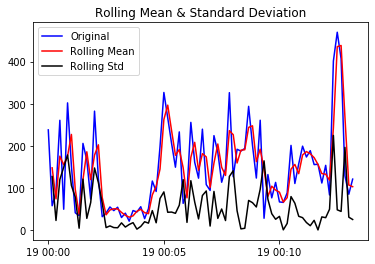

In [14]:
test_stationarity(datascale)

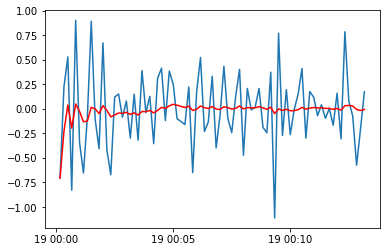

In [16]:
#here we will find exponential moving average
# expwighted_avg = pd.ewm(ts_log, halflife=12)
expwighted_avg = datascale.ewm(halflife=12, min_periods = 0, adjust = True).mean()
plt.plot(datascale)
plt.plot(expwighted_avg, color='red')

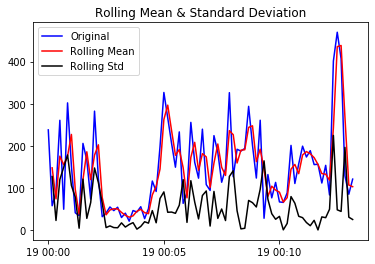

In [17]:
datascaleweightedavg = datascale - expwighted_avg
test_stationarity(datascaleweightedavg)

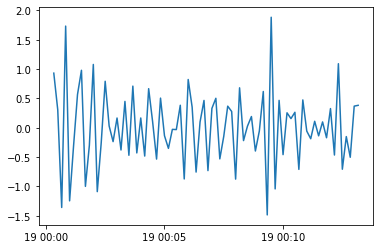

In [21]:
datascaleweightedavgshift = datascale - datascale.shift()
plt.plot(datascaleweightedavgshift)

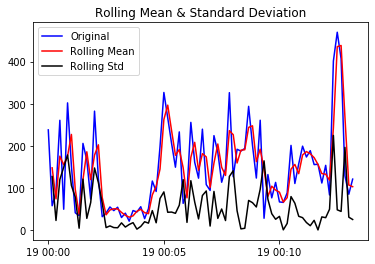

In [22]:
datascaleweightedavgshift.dropna(inplace = True)
test_stationarity(datascaleweightedavgshift)

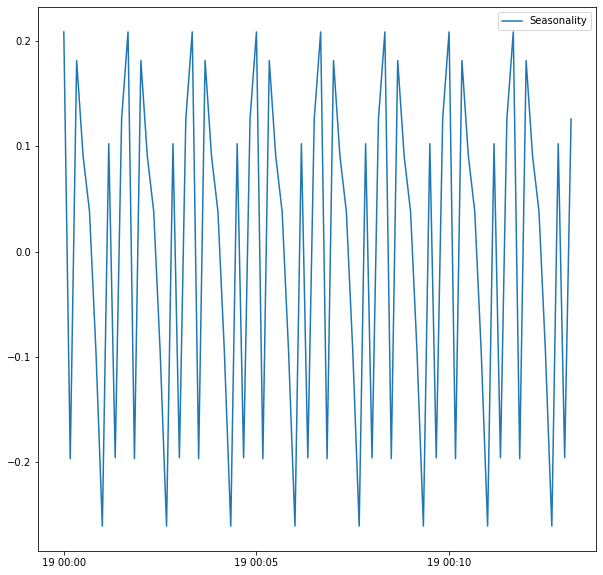

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log,freq=10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,10))
# plt.subplot(411)
# plt.plot(datascale, label='Original')
# plt.legend(loc='best')
# # plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# # plt.subplot(413)
plt.plot(seasonal.index,seasonal.feature,label='Seasonality')
plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

In [89]:
seasonal

,feature
time,
2019-03-19 00:00:00,0.208841
2019-03-19 00:00:10,-0.196865
2019-03-19 00:00:20,0.181597
2019-03-19 00:00:30,0.090969
2019-03-19 00:00:40,0.038084
...,...
2019-03-19 00:12:30,-0.094392
2019-03-19 00:12:40,-0.260941
2019-03-19 00:12:50,0.102598


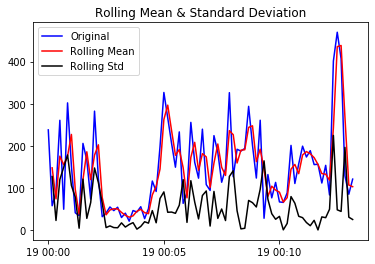

In [34]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [50]:
from statsmodels.tsa.arima_model import ARIMA
# we can change the order 
model = ARIMA(data_log, order = (2,1,2))
output = model.fit()
print(output.summary())

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.feature   No. Observations:                   79
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -76.681
Method:                       css-mle   S.D. of innovations              0.627
Date:                Mon, 20 Apr 2020   AIC                            165.362
Time:                        01:35:30   BIC                            179.578
Sample:                    03-19-2019   HQIC                           171.057
                         - 03-19-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0082      0.007      1.164      0.248      -0.006       0.022
ar.L1.D.feature     0.7957      0.306      2.601      0.011       0.196       1.395
ar.L2.D.feature     0.0065      

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [54]:
start=pd.to_datetime('2019-03-19 00:00:10')
end=pd.to_datetime('2019-03-19 00:13:10')

In [55]:
yhat1= output.predict(start =start ,end=end)
yhat1

2019-03-19 00:00:10    0.008154
2019-03-19 00:00:20    0.630682
2019-03-19 00:00:30    0.122290
2019-03-19 00:00:40   -0.524245
2019-03-19 00:00:50    0.691153
                         ...   
2019-03-19 00:12:30   -0.758317
2019-03-19 00:12:40   -0.654803
2019-03-19 00:12:50   -0.419448
2019-03-19 00:13:00    0.426234
2019-03-19 00:13:10    0.554194
Freq: 10S, Length: 79, dtype: float64

In [59]:
predictions_ARIMA_diff = pd.Series(yhat1, copy=True)
predictions_ARIMA_diff.head()

2019-03-19 00:00:10    0.008154
2019-03-19 00:00:20    0.630682
2019-03-19 00:00:30    0.122290
2019-03-19 00:00:40   -0.524245
2019-03-19 00:00:50    0.691153
Freq: 10S, dtype: float64

In [60]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

2019-03-19 00:00:10    0.008154
2019-03-19 00:00:20    0.638836
2019-03-19 00:00:30    0.761126
2019-03-19 00:00:40    0.236882
2019-03-19 00:00:50    0.928035
Freq: 10S, dtype: float64

In [70]:
predictions_ARIMA_log = pd.Series(data_log.ix[1], index=data_log.index[1:])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\MANDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


time
2019-03-19 00:00:10    0.008154
2019-03-19 00:00:20    0.638836
2019-03-19 00:00:30    0.761126
2019-03-19 00:00:40    0.236882
2019-03-19 00:00:50    0.928035
dtype: float64

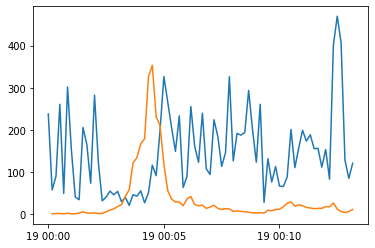

In [71]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

In [72]:
predictions_ARIMA

time
2019-03-19 00:00:10     1.008188
2019-03-19 00:00:20     1.894275
2019-03-19 00:00:30     2.140686
2019-03-19 00:00:40     1.267291
2019-03-19 00:00:50     2.529534
                         ...    
2019-03-19 00:12:30    12.624156
2019-03-19 00:12:40     6.558808
2019-03-19 00:12:50     4.311825
2019-03-19 00:13:00     6.603470
2019-03-19 00:13:10    11.493593
Length: 79, dtype: float64

C:\Users\MANDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


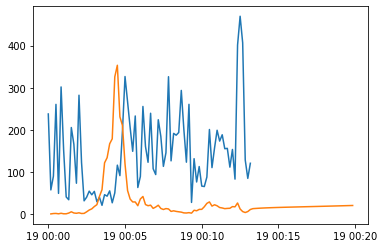

In [75]:
start=pd.to_datetime('2019-03-19 00:00:10')
end=pd.to_datetime('2019-03-19 00:19:50')
yhat2= output.predict(start =start ,end=end)
predictions_ARIMA_diff = pd.Series(yhat1, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(data_log.ix[1], index=data_log.index[1:])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA1 = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA1)

In [79]:
original = data.iloc[1:,0]

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(predictions_ARIMA,original))
print(rmse)

166.74498041717422


In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data_log,
                               order = (2,1,2),
                               seasonal_order = (1,1,1,12),enforce_stationarity = False, enforce_invertibility=False)
output = model.fit()
print(output.summary())